In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Airleinesafety.csv')

# Display the first few rows and basic information
print(df.head())
print(df.info())


Mounted at /content/drive
                 airline  avail_seat_km_per_week  incidents_85_99  \
0             Aer Lingus               320906734                2   
1              Aeroflot*              1197672318               76   
2  Aerolineas Argentinas               385803648                6   
3            Aeromexico*               596871813                3   
4             Air Canada              1865253802                2   

   fatal_accidents_85_99  fatalities_85_99  incidents_00_14  \
0                      0                 0                0   
1                     14               128                6   
2                      0                 0                1   
3                      1                64                5   
4                      0                 0                2   

   fatal_accidents_00_14  fatalities_00_14  
0                      0                 0  
1                      1                88  
2                      0                 0  


In [9]:
print(df.describe())
print(df.dtypes)
print(df['airline'].unique())



       avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
count            5.600000e+01        56.000000              56.000000   
mean             1.384621e+09         7.178571               2.178571   
std              1.465317e+09        11.035656               2.861069   
min              2.593733e+08         0.000000               0.000000   
25%              4.740362e+08         2.000000               0.000000   
50%              8.029089e+08         4.000000               1.000000   
75%              1.847239e+09         8.000000               3.000000   
max              7.139291e+09        76.000000              14.000000   

       fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
count         56.000000        56.000000              56.000000   
mean         112.410714         4.125000               0.660714   
std          146.691114         4.544977               0.858684   
min            0.000000         0.000000               0.000000   
25%    

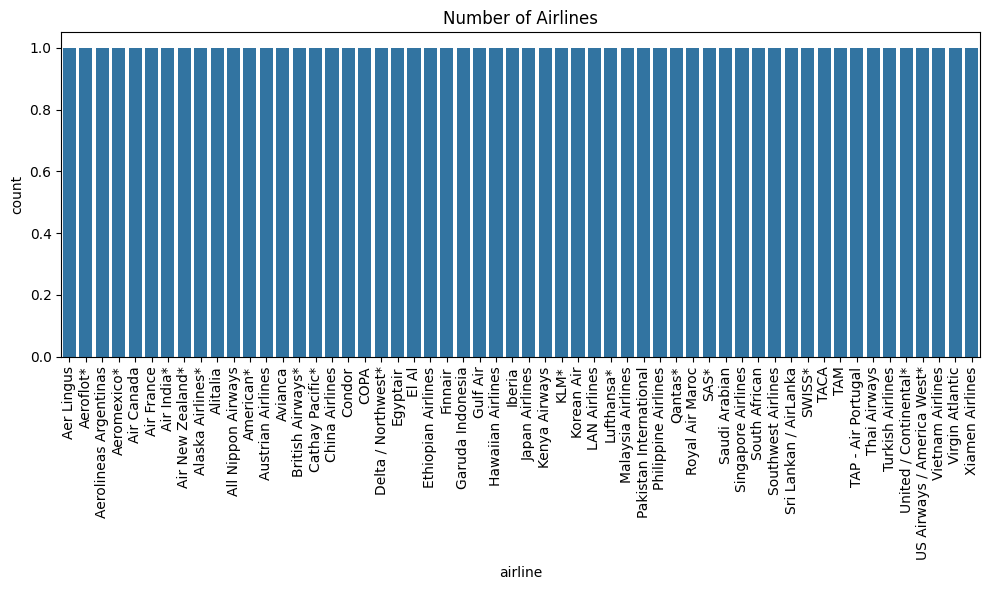

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='airline', data=df)
plt.title('Number of Airlines')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


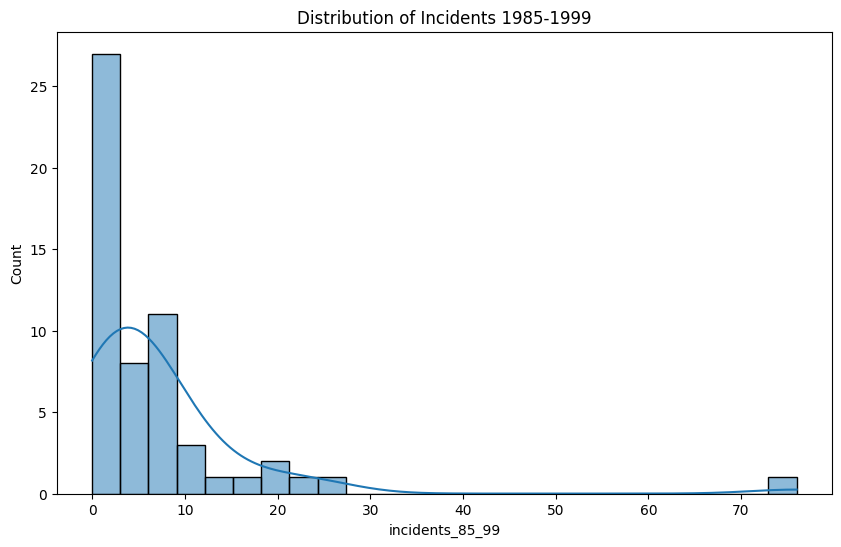

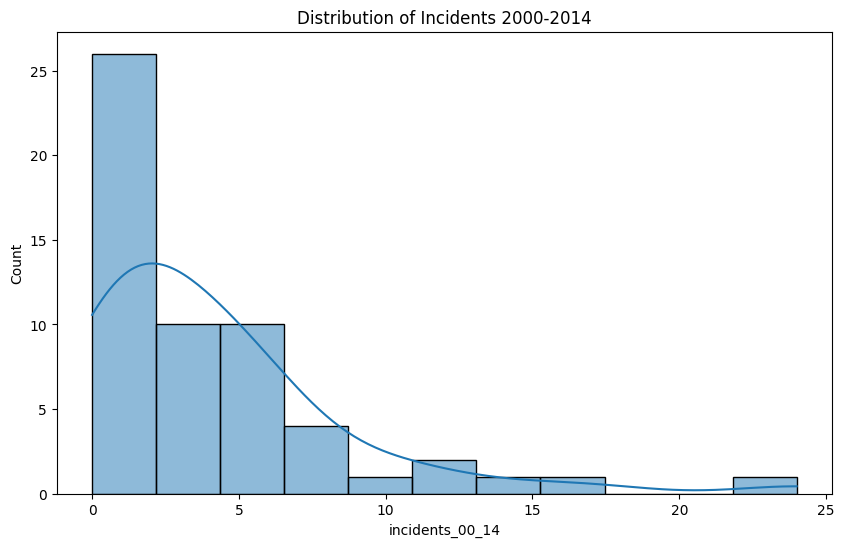

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['incidents_85_99'], kde=True)
plt.title('Distribution of Incidents 1985-1999')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['incidents_00_14'], kde=True)
plt.title('Distribution of Incidents 2000-2014')
plt.show()


In [12]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()



ValueError: could not convert string to float: 'Aer Lingus'

                        avail_seat_km_per_week  incidents_85_99  \
avail_seat_km_per_week                1.000000         0.279538   
incidents_85_99                       0.279538         1.000000   
fatal_accidents_85_99                 0.468300         0.856991   
fatalities_85_99                      0.209835         0.274394   
incidents_00_14                       0.725917         0.403009   
fatal_accidents_00_14                 0.375673         0.390249   
fatalities_00_14                      0.228484         0.195337   

                        fatal_accidents_85_99  fatalities_85_99  \
avail_seat_km_per_week               0.468300          0.209835   
incidents_85_99                      0.856991          0.274394   
fatal_accidents_85_99                1.000000          0.540866   
fatalities_85_99                     0.540866          1.000000   
incidents_00_14                      0.572923          0.273696   
fatal_accidents_00_14                0.498758          0.2281

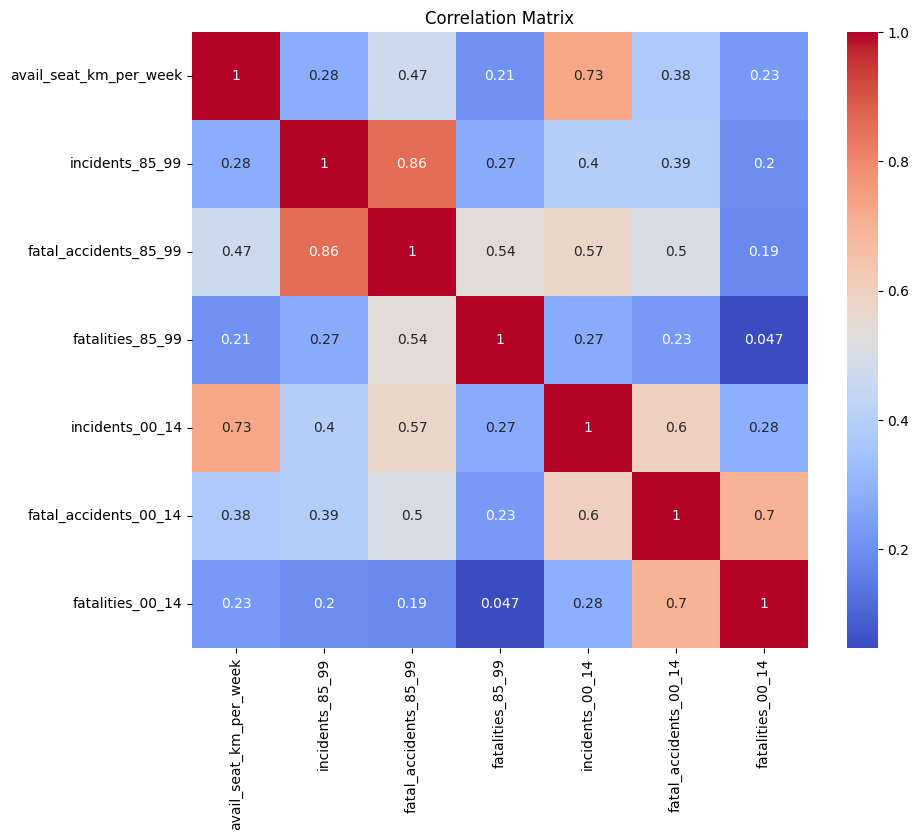

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


                        avail_seat_km_per_week  incidents_85_99  \
avail_seat_km_per_week                1.000000         0.279538   
incidents_85_99                       0.279538         1.000000   
fatal_accidents_85_99                 0.468300         0.856991   
fatalities_85_99                      0.209835         0.274394   
incidents_00_14                       0.725917         0.403009   
fatal_accidents_00_14                 0.375673         0.390249   
fatalities_00_14                      0.228484         0.195337   

                        fatal_accidents_85_99  fatalities_85_99  \
avail_seat_km_per_week               0.468300          0.209835   
incidents_85_99                      0.856991          0.274394   
fatal_accidents_85_99                1.000000          0.540866   
fatalities_85_99                     0.540866          1.000000   
incidents_00_14                      0.572923          0.273696   
fatal_accidents_00_14                0.498758          0.2281

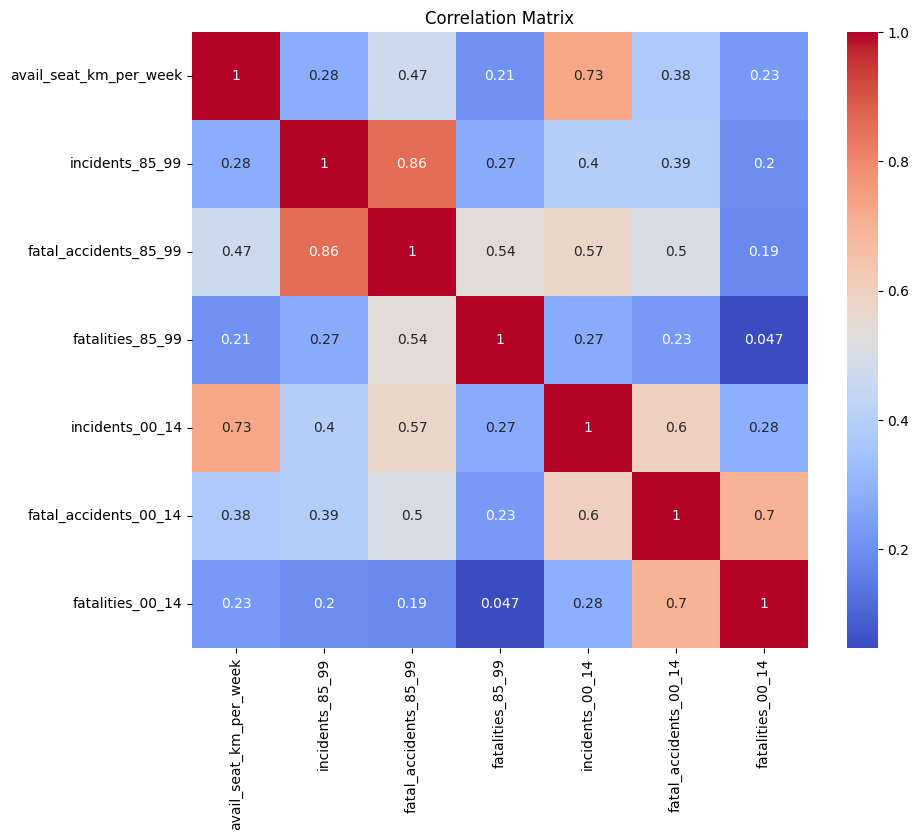

                                    avail_seat_km_per_week  incidents_85_99  \
avail_seat_km_per_week                            1.000000         0.279538   
incidents_85_99                                   0.279538         1.000000   
fatal_accidents_85_99                             0.468300         0.856991   
fatalities_85_99                                  0.209835         0.274394   
incidents_00_14                                   0.725917         0.403009   
...                                                    ...              ...   
airline_US Airways / America West*                0.099453         0.108761   
airline_United / Continental*                     0.534343         0.145748   
airline_Vietnam Airlines                         -0.070526        -0.002202   
airline_Virgin Atlantic                          -0.035226        -0.076177   
airline_Xiamen Airlines                          -0.088597         0.022457   

                                    fatal_accidents

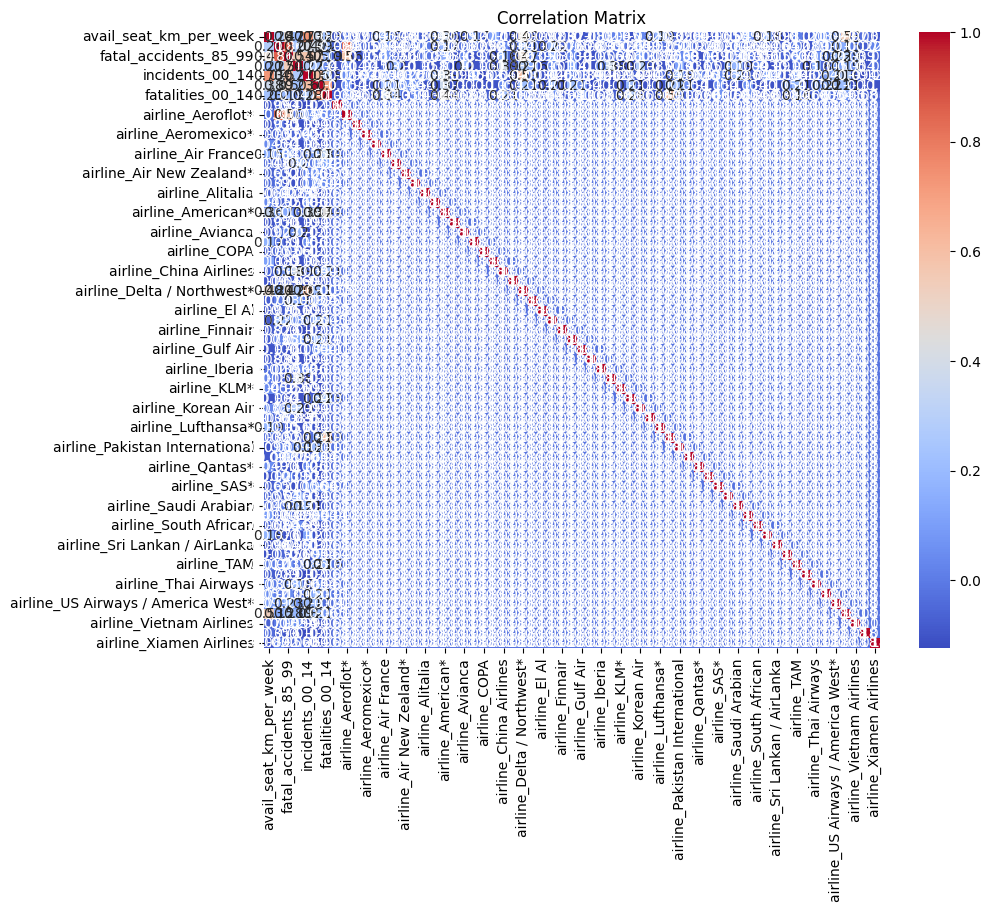

In [14]:
# Calculate correlation matrix, ignoring non-numeric columns
corr_matrix = df.corr(numeric_only=True)

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Convert categorical variables to dummy variables
dummy_df = pd.get_dummies(df, columns=['airline'])

# Calculate correlation matrix
corr_matrix = dummy_df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


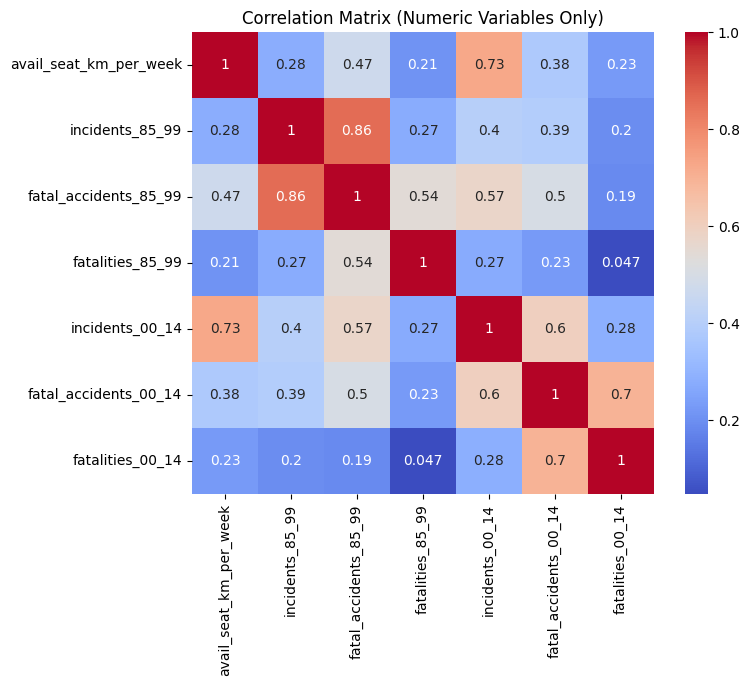

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()


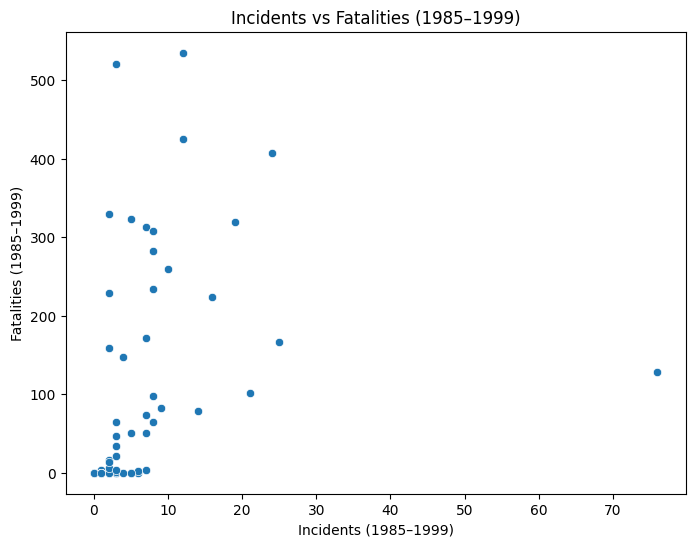

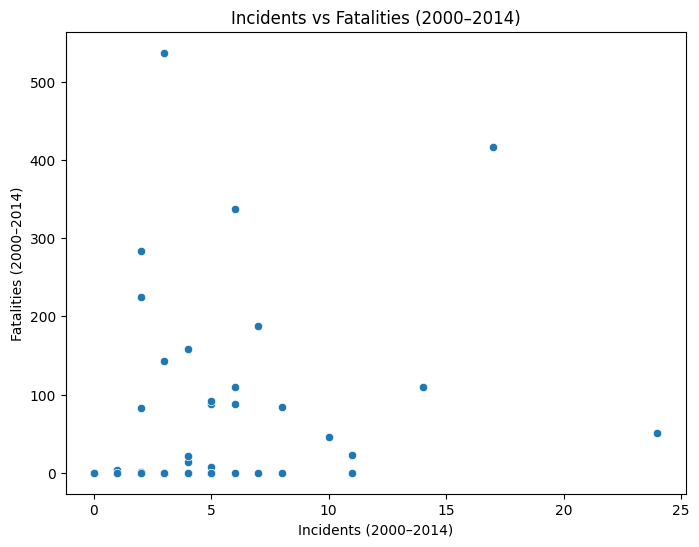

In [16]:
# Scatterplot: Incidents vs Fatalities (1985–1999)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='incidents_85_99', y='fatalities_85_99', data=numeric_df)
plt.title('Incidents vs Fatalities (1985–1999)')
plt.xlabel('Incidents (1985–1999)')
plt.ylabel('Fatalities (1985–1999)')
plt.show()

# Scatterplot: Incidents vs Fatalities (2000–2014)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='incidents_00_14', y='fatalities_00_14', data=numeric_df)
plt.title('Incidents vs Fatalities (2000–2014)')
plt.xlabel('Incidents (2000–2014)')
plt.ylabel('Fatalities (2000–2014)')
plt.show()


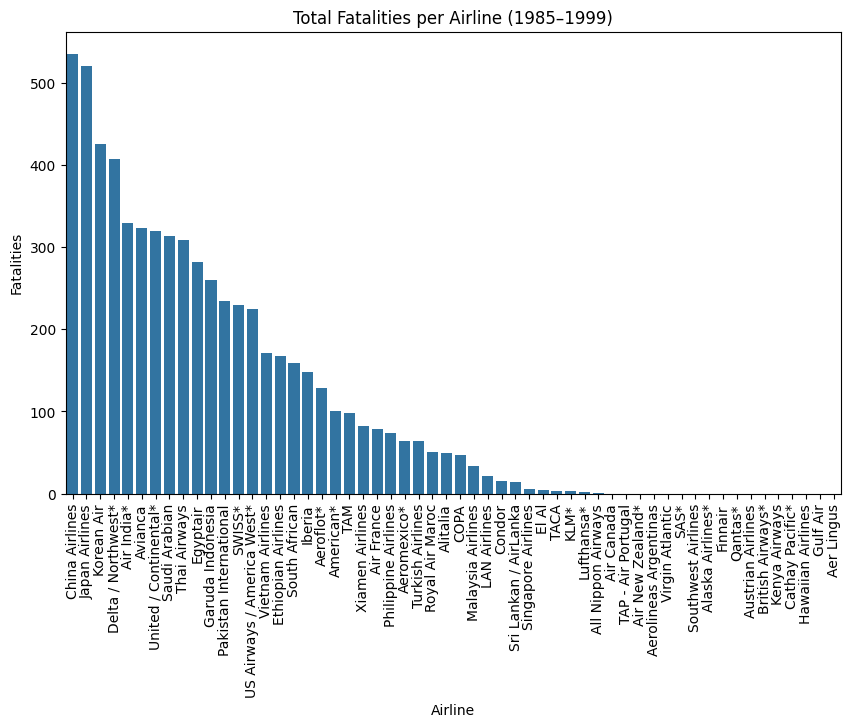

In [17]:
# Aggregate data by airline
airline_summary = df.groupby('airline').sum()

# Sort by total fatalities
sorted_airlines = airline_summary.sort_values(by='fatalities_85_99', ascending=False)

# Bar plot: Total fatalities per airline (1985–1999)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_airlines.index, y=sorted_airlines['fatalities_85_99'])
plt.xticks(rotation=90)
plt.title('Total Fatalities per Airline (1985–1999)')
plt.ylabel('Fatalities')
plt.xlabel('Airline')
plt.show()


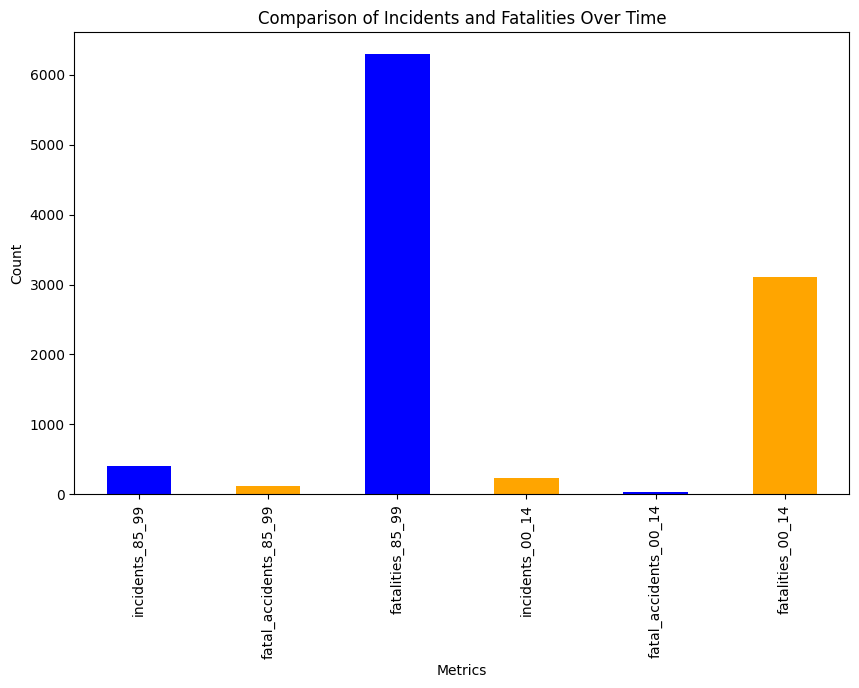

In [18]:
# Compare incidents and fatalities over time
time_periods = ['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99',
                'incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14']
df_time_comparison = df[time_periods].sum()

# Bar plot for comparison
df_time_comparison.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Comparison of Incidents and Fatalities Over Time')
plt.ylabel('Count')
plt.xlabel('Metrics')
plt.show()


In [19]:
from scipy.stats import ttest_ind

# T-test: Compare fatalities between two time periods
t_stat, p_value = ttest_ind(df['fatalities_85_99'], df['fatalities_00_14'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 2.3118889051506555, P-value: 0.022645920541900316


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data for modeling
X = numeric_df[['avail_seat_km_per_week', 'incidents_85_99']]
y = numeric_df['fatal_accidents_85_99']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model performance
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("R-squared Score:", model.score(X_test, y_test))


Model Coefficients: [3.28671180e-10 1.95895221e-01]
Model Intercept: 0.21020406785555168
R-squared Score: 0.7112973076222646


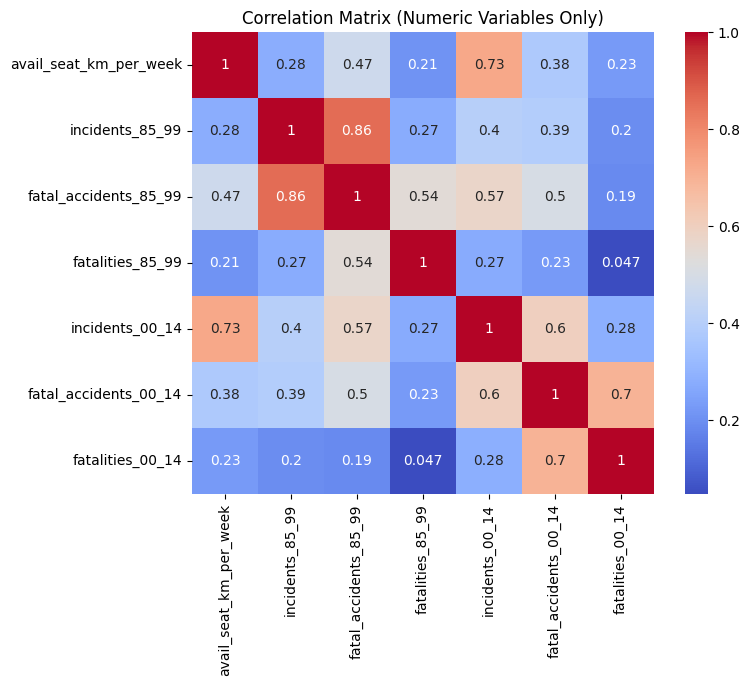

In [21]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate and visualize refined correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()


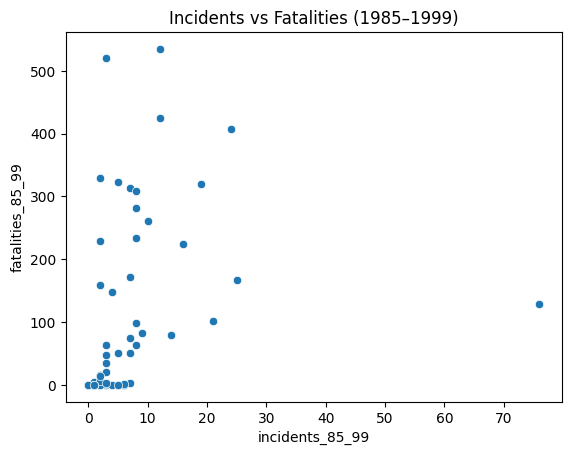

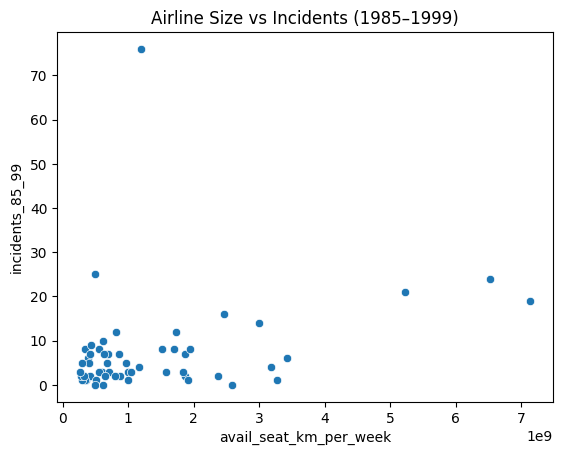

In [22]:
# Scatterplot: Incidents vs Fatalities (1985–1999)
sns.scatterplot(x='incidents_85_99', y='fatalities_85_99', data=df)
plt.title('Incidents vs Fatalities (1985–1999)')
plt.show()

# Scatterplot: Airline Size vs Incidents
sns.scatterplot(x='avail_seat_km_per_week', y='incidents_85_99', data=df)
plt.title('Airline Size vs Incidents (1985–1999)')
plt.show()


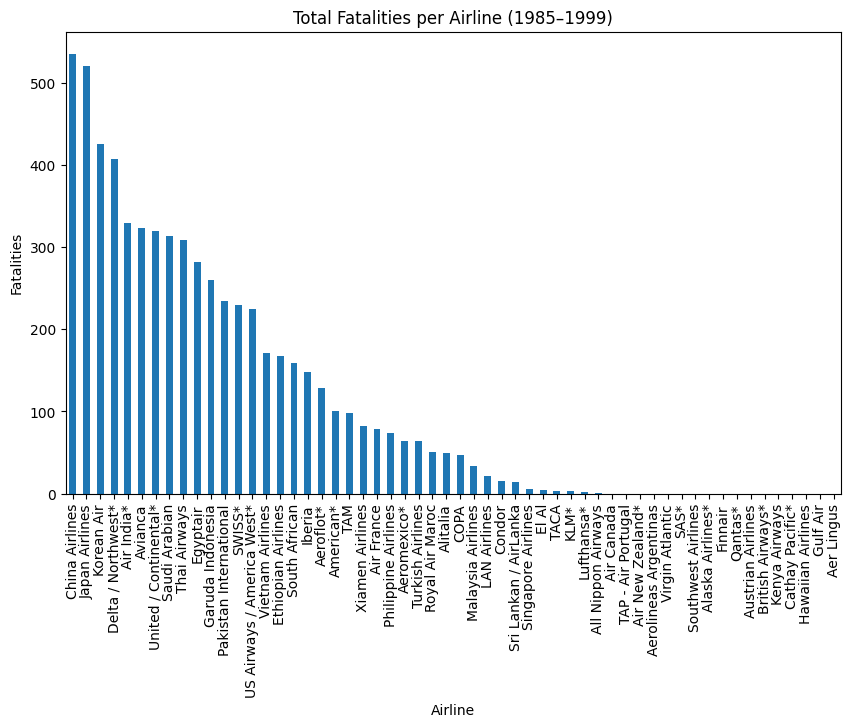

In [23]:
# Aggregate data by airline
airline_summary = df.groupby('airline').sum()

# Sort by total fatalities
sorted_airlines = airline_summary.sort_values(by='fatalities_85_99', ascending=False)

# Bar plot: Total fatalities per airline (1985–1999)
sorted_airlines['fatalities_85_99'].plot(kind='bar', figsize=(10, 6))
plt.title('Total Fatalities per Airline (1985–1999)')
plt.ylabel('Fatalities')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.show()


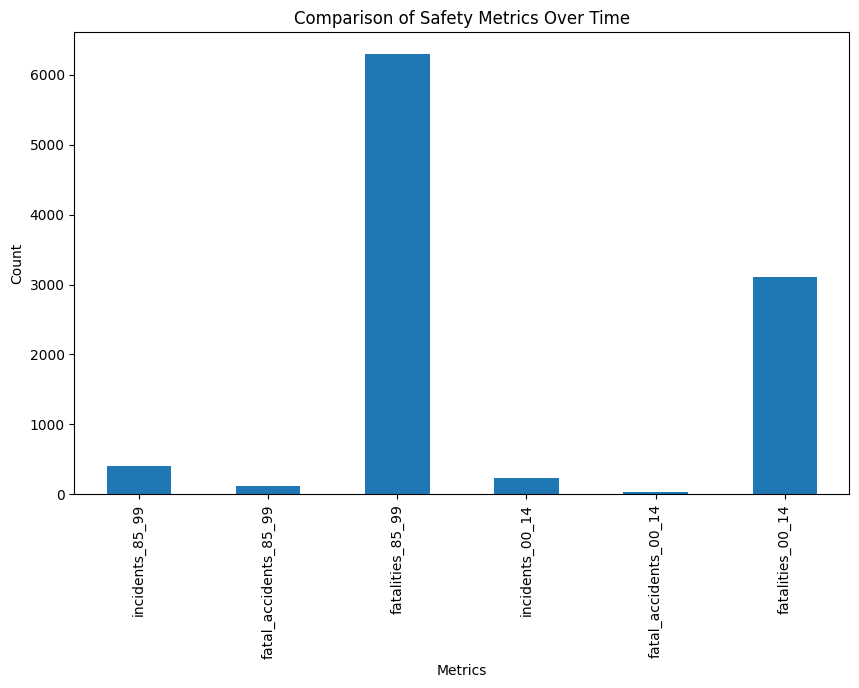

In [24]:
# Compare incidents and fatalities over time
time_comparison = df[['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99',
                      'incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14']].sum()

time_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Safety Metrics Over Time')
plt.ylabel('Count')
plt.xlabel('Metrics')
plt.show()


In [25]:
from scipy.stats import ttest_ind

# T-test: Compare fatalities between two time periods
t_stat, p_value = ttest_ind(df['fatalities_85_99'], df['fatalities_00_14'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 2.3118889051506555, P-value: 0.022645920541900316


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = numeric_df[['avail_seat_km_per_week', 'incidents_85_99']]
y = numeric_df['fatal_accidents_85_99']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("R-squared Score:", model.score(X_test, y_test))


Model Coefficients: [3.28671180e-10 1.95895221e-01]
R-squared Score: 0.7112973076222646


In [27]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)


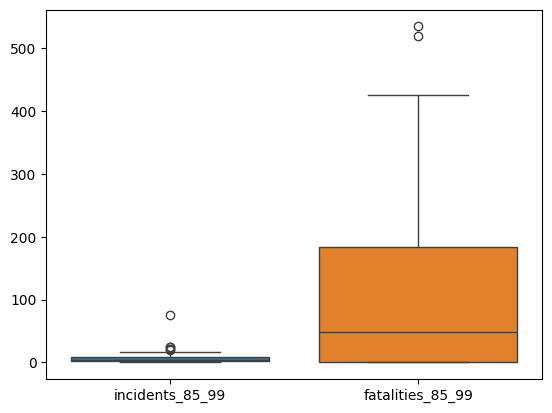

In [28]:
sns.boxplot(data=df[['incidents_85_99', 'fatalities_85_99']])
df['airline'] = df['airline'].str.strip().str.upper()


airline
AER LINGUS                    1
AEROFLOT*                     1
KLM*                          1
KOREAN AIR                    1
LAN AIRLINES                  1
LUFTHANSA*                    1
MALAYSIA AIRLINES             1
PAKISTAN INTERNATIONAL        1
PHILIPPINE AIRLINES           1
QANTAS*                       1
ROYAL AIR MAROC               1
SAS*                          1
SAUDI ARABIAN                 1
SINGAPORE AIRLINES            1
SOUTH AFRICAN                 1
SOUTHWEST AIRLINES            1
SRI LANKAN / AIRLANKA         1
SWISS*                        1
TACA                          1
TAM                           1
TAP - AIR PORTUGAL            1
THAI AIRWAYS                  1
TURKISH AIRLINES              1
UNITED / CONTINENTAL*         1
US AIRWAYS / AMERICA WEST*    1
VIETNAM AIRLINES              1
VIRGIN ATLANTIC               1
KENYA AIRWAYS                 1
JAPAN AIRLINES                1
IBERIA                        1
AVIANCA                       1


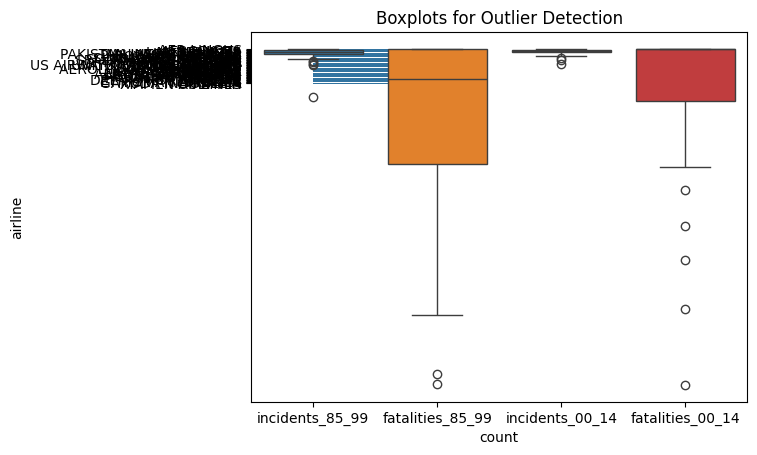

In [29]:
print(df['airline'].value_counts())
sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index)
sns.boxplot(data=df[['incidents_85_99', 'fatalities_85_99', 'incidents_00_14', 'fatalities_00_14']])
plt.title('Boxplots for Outlier Detection')
plt.show()


In [30]:
print(df.isnull().sum())  # Check for missing values
df.fillna(0, inplace=True)  # Example: Replace missing values with 0 (modify as needed)


airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64


In [31]:
print(df.duplicated().sum())  # Check for duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicates


0


In [32]:
df['airline'] = df['airline'].str.strip().str.upper()  # Example: Convert to uppercase and remove spaces


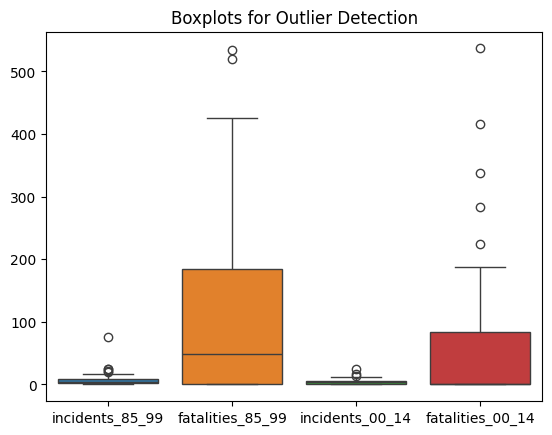

In [33]:
sns.boxplot(data=df[['incidents_85_99', 'fatalities_85_99', 'incidents_00_14', 'fatalities_00_14']])
plt.title('Boxplots for Outlier Detection')
plt.show()


In [36]:
print(df.describe())
print(df.skew())
print(df.var())

       avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
count            5.600000e+01        56.000000              56.000000   
mean             1.384621e+09         7.178571               2.178571   
std              1.465317e+09        11.035656               2.861069   
min              2.593733e+08         0.000000               0.000000   
25%              4.740362e+08         2.000000               0.000000   
50%              8.029089e+08         4.000000               1.000000   
75%              1.847239e+09         8.000000               3.000000   
max              7.139291e+09        76.000000              14.000000   

       fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
count         56.000000        56.000000              56.000000   
mean         112.410714         4.125000               0.660714   
std          146.691114         4.544977               0.858684   
min            0.000000         0.000000               0.000000   
25%    

TypeError: could not convert string to float: 'AER LINGUS'

                        avail_seat_km_per_week  incidents_85_99  \
avail_seat_km_per_week                1.000000         0.279538   
incidents_85_99                       0.279538         1.000000   
fatal_accidents_85_99                 0.468300         0.856991   
fatalities_85_99                      0.209835         0.274394   
incidents_00_14                       0.725917         0.403009   
fatal_accidents_00_14                 0.375673         0.390249   
fatalities_00_14                      0.228484         0.195337   

                        fatal_accidents_85_99  fatalities_85_99  \
avail_seat_km_per_week               0.468300          0.209835   
incidents_85_99                      0.856991          0.274394   
fatal_accidents_85_99                1.000000          0.540866   
fatalities_85_99                     0.540866          1.000000   
incidents_00_14                      0.572923          0.273696   
fatal_accidents_00_14                0.498758          0.2281

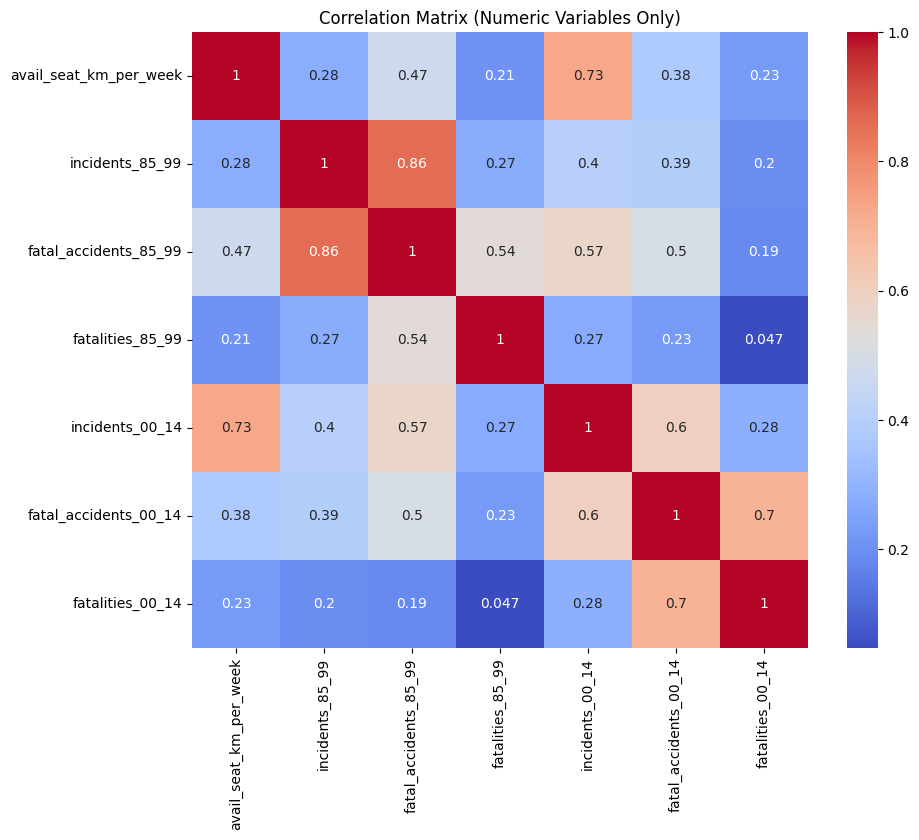

In [37]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numeric Variables Only)')
plt.show()


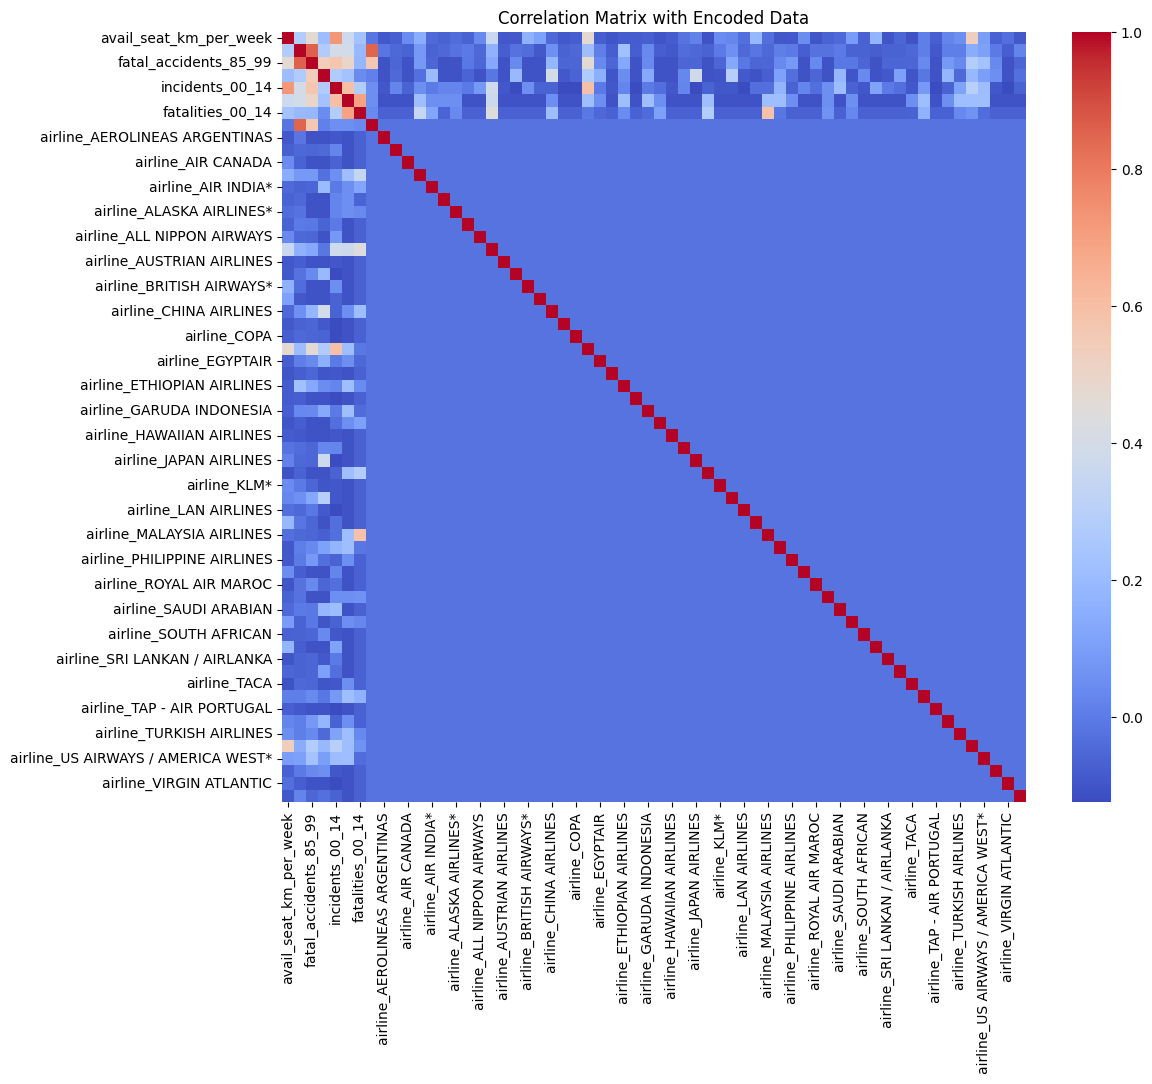

In [38]:
# Convert categorical variables to dummy variables (one-hot encoding)
dummy_df = pd.get_dummies(df, columns=['airline'], drop_first=True)

# Calculate correlation matrix with encoded data
corr_matrix = dummy_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Data')
plt.show()


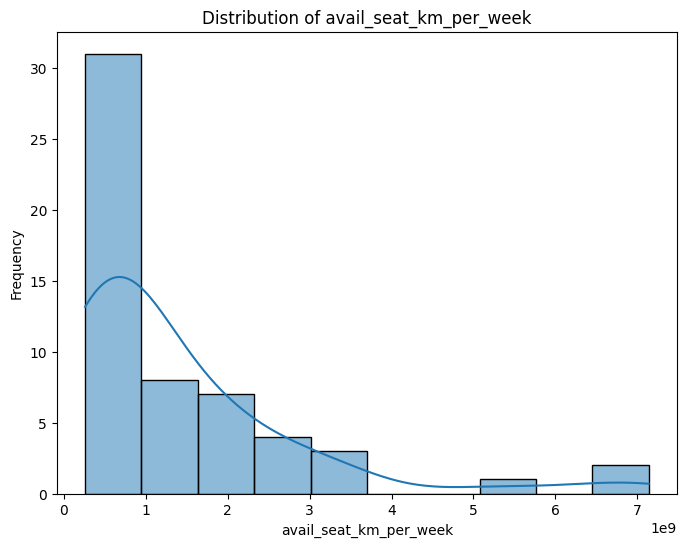

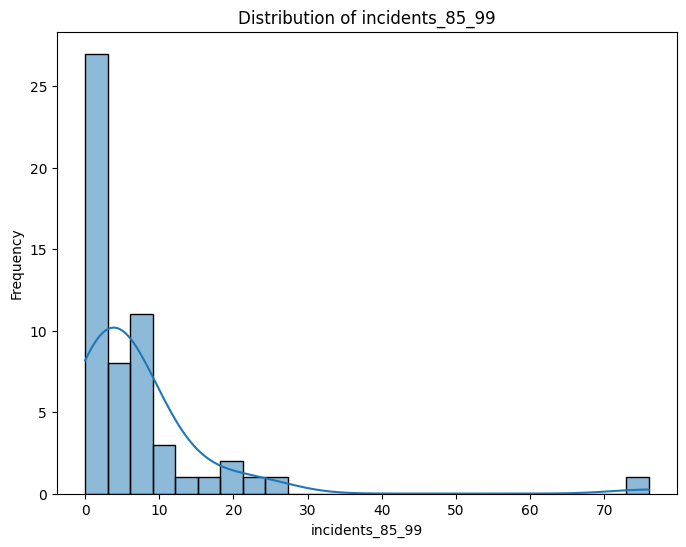

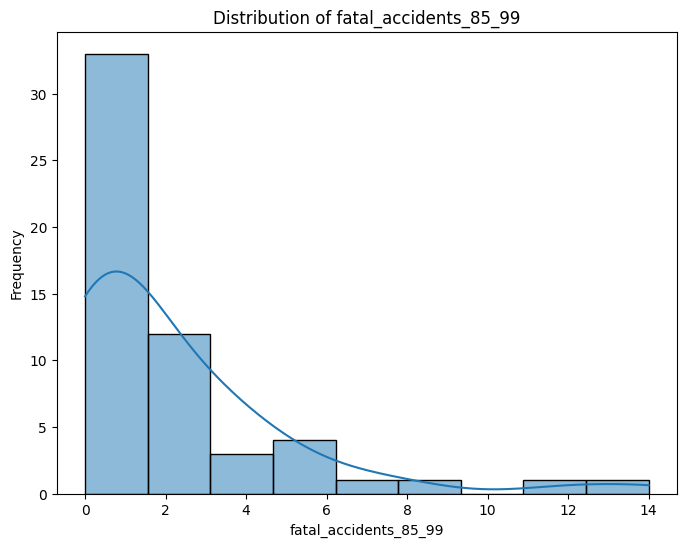

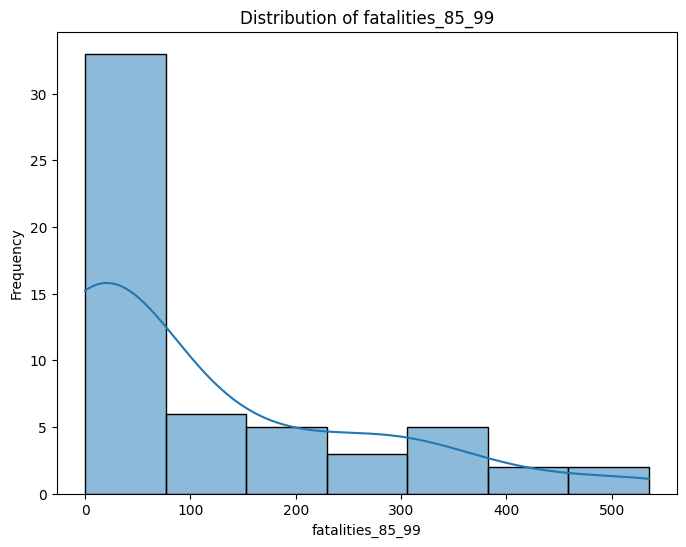

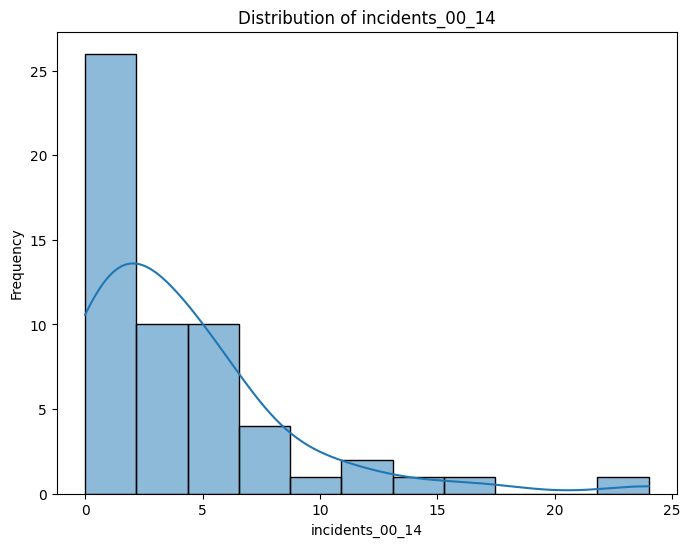

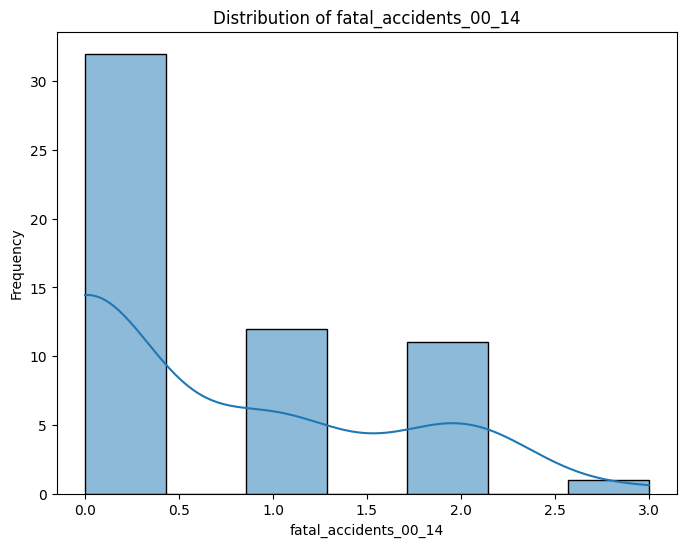

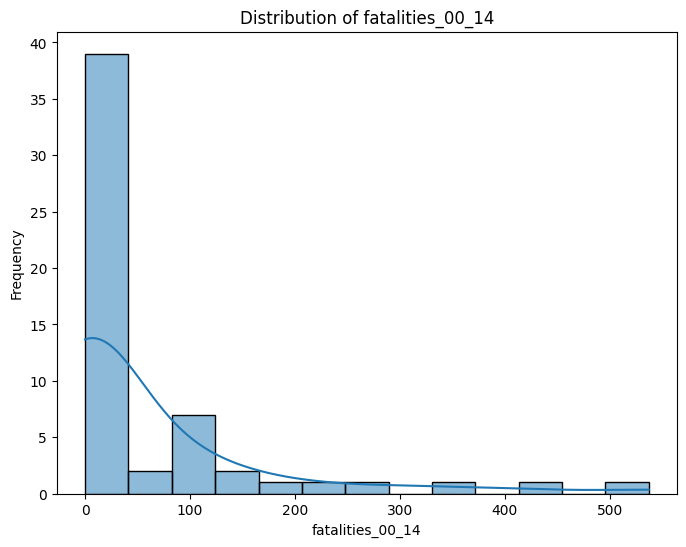

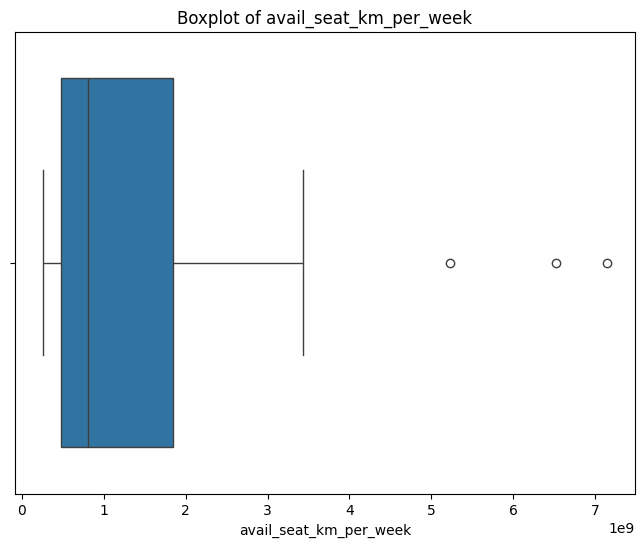

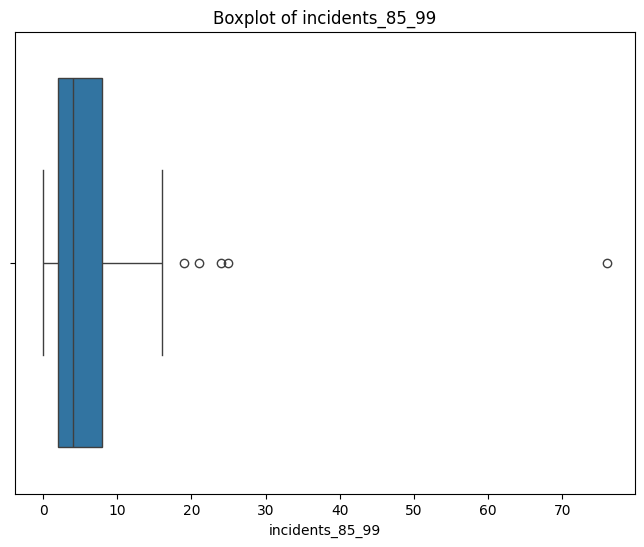

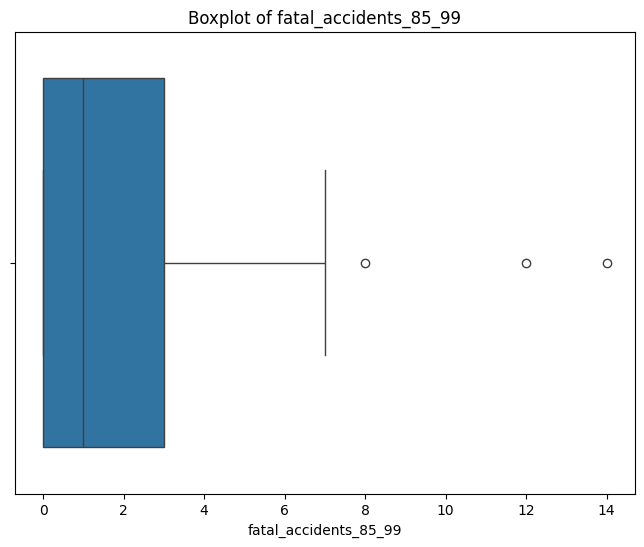

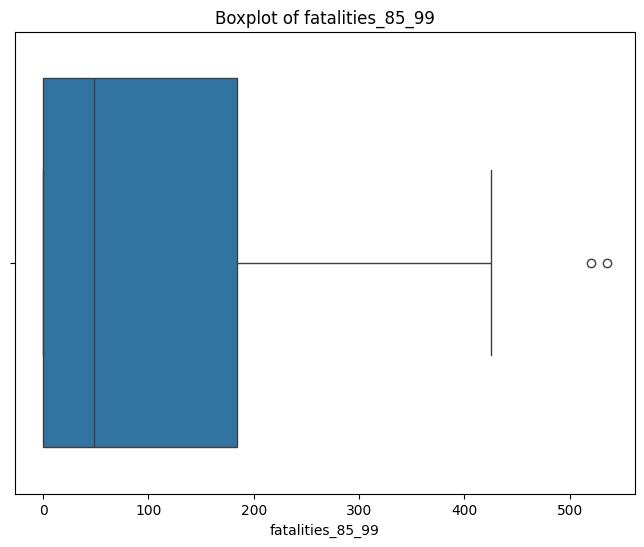

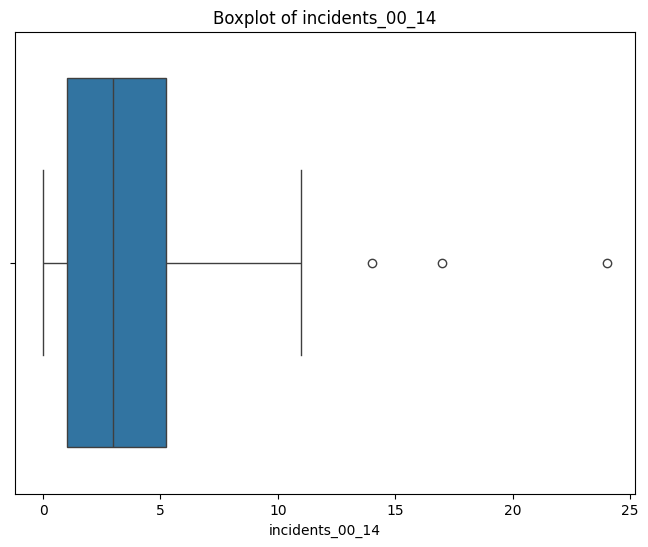

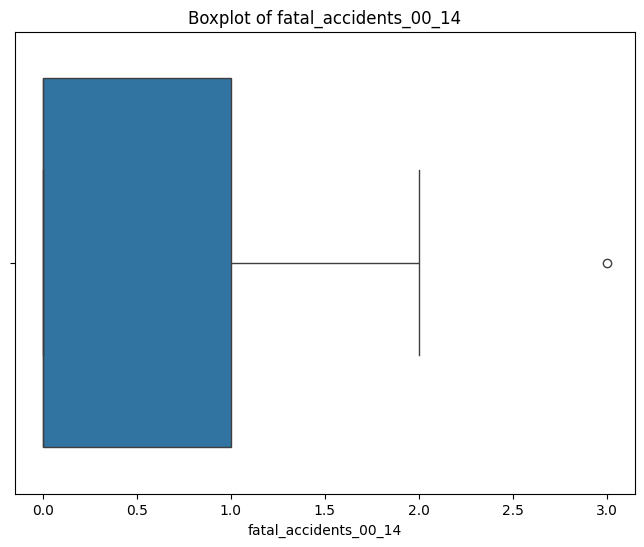

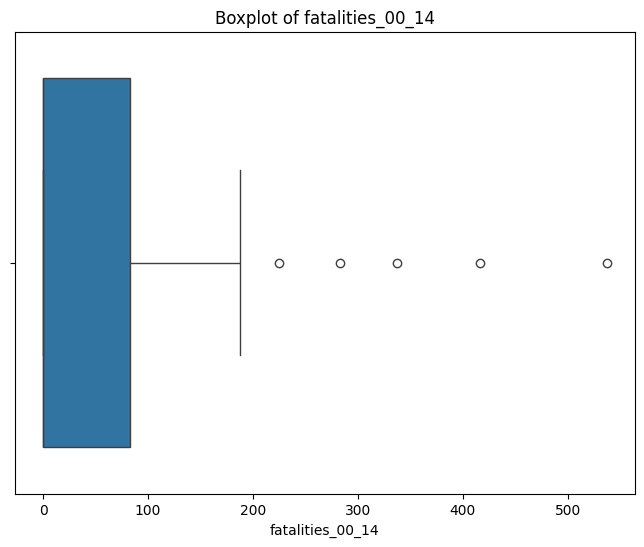

In [39]:
# Histograms for numerical columns
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(numeric_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for numerical columns
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numeric_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


       avail_seat_km_per_week  incidents_85_99  fatal_accidents_85_99  \
count            5.600000e+01        56.000000              56.000000   
mean             1.384621e+09         7.178571               2.178571   
std              1.465317e+09        11.035656               2.861069   
min              2.593733e+08         0.000000               0.000000   
25%              4.740362e+08         2.000000               0.000000   
50%              8.029089e+08         4.000000               1.000000   
75%              1.847239e+09         8.000000               3.000000   
max              7.139291e+09        76.000000              14.000000   

       fatalities_85_99  incidents_00_14  fatal_accidents_00_14  \
count         56.000000        56.000000              56.000000   
mean         112.410714         4.125000               0.660714   
std          146.691114         4.544977               0.858684   
min            0.000000         0.000000               0.000000   
25%    

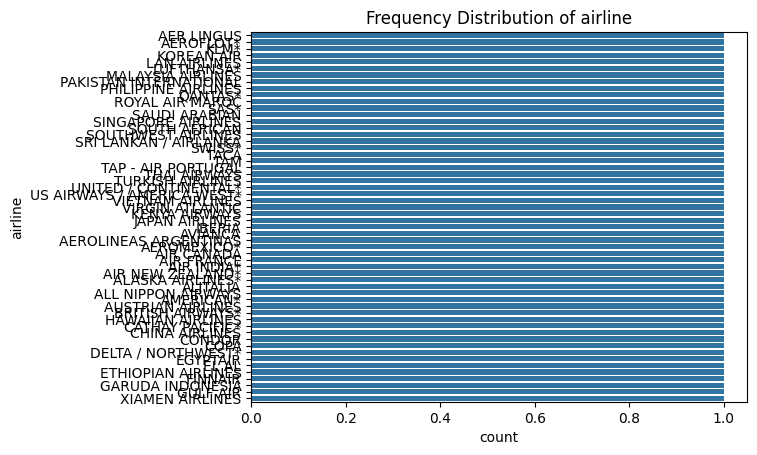

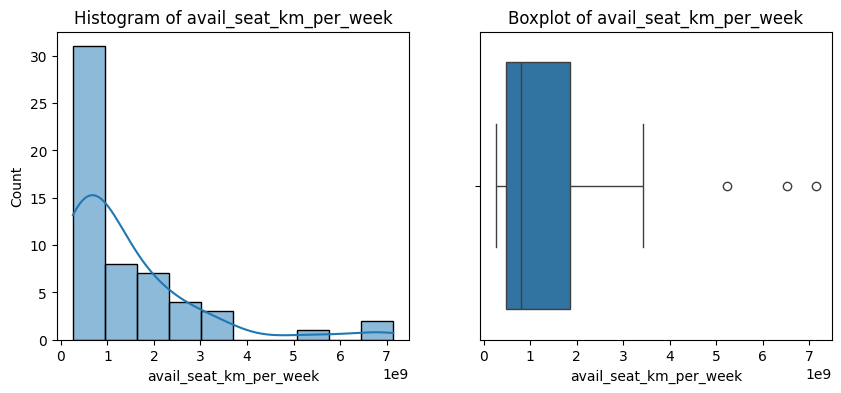

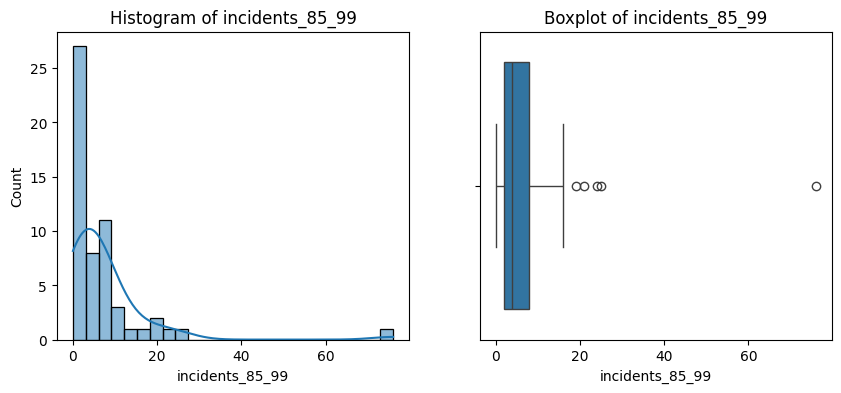

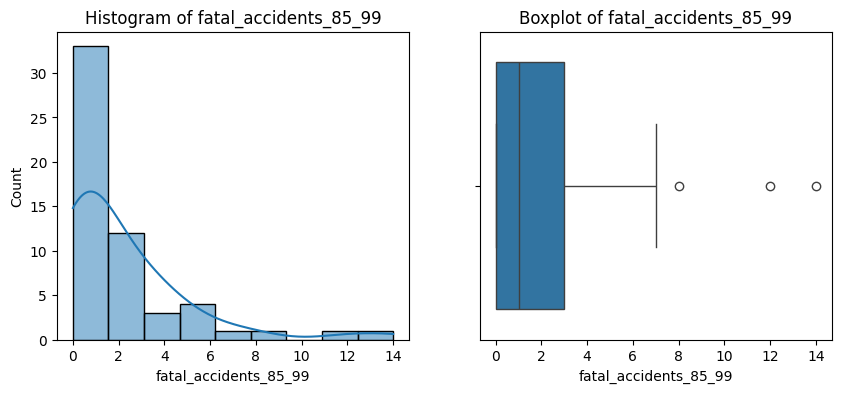

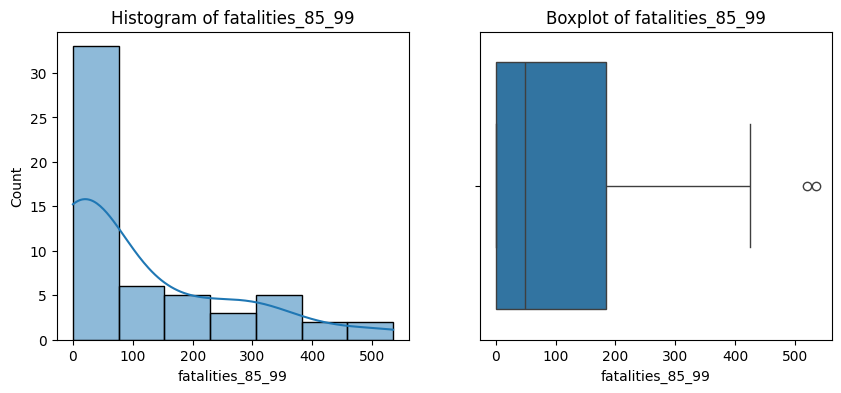

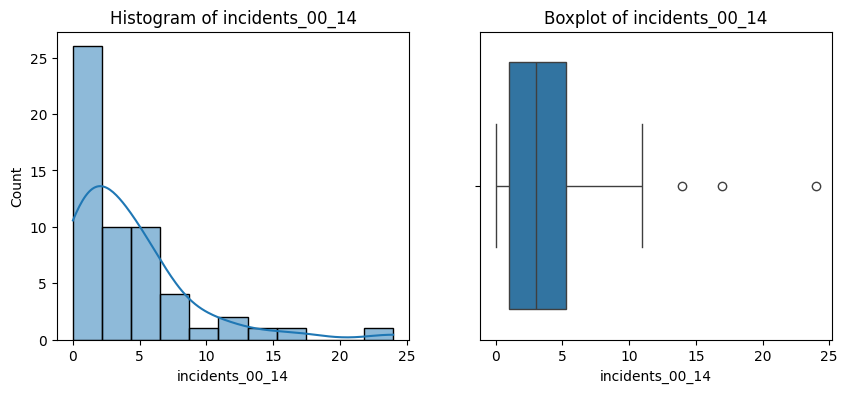

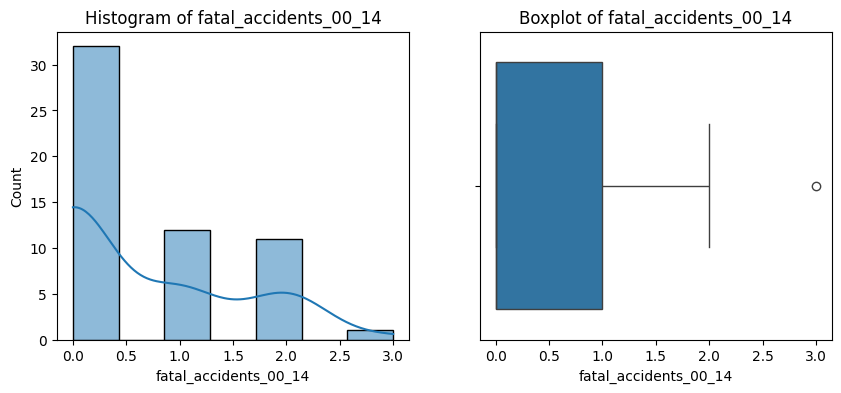

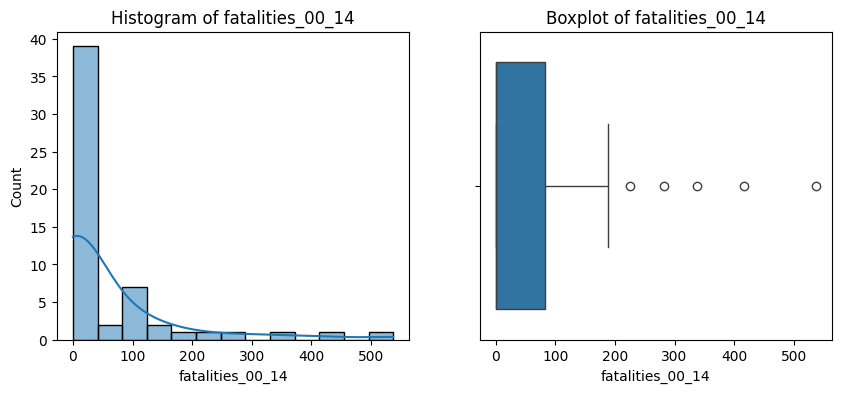

In [40]:
# Summary statistics for numerical columns
print(df.describe())

# Frequency distributions for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(df[col].value_counts())
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Frequency Distribution of {col}')
    plt.show()

# Histograms and boxplots for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()


<ipython-input-41-aab88c2c4951>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="viridis")


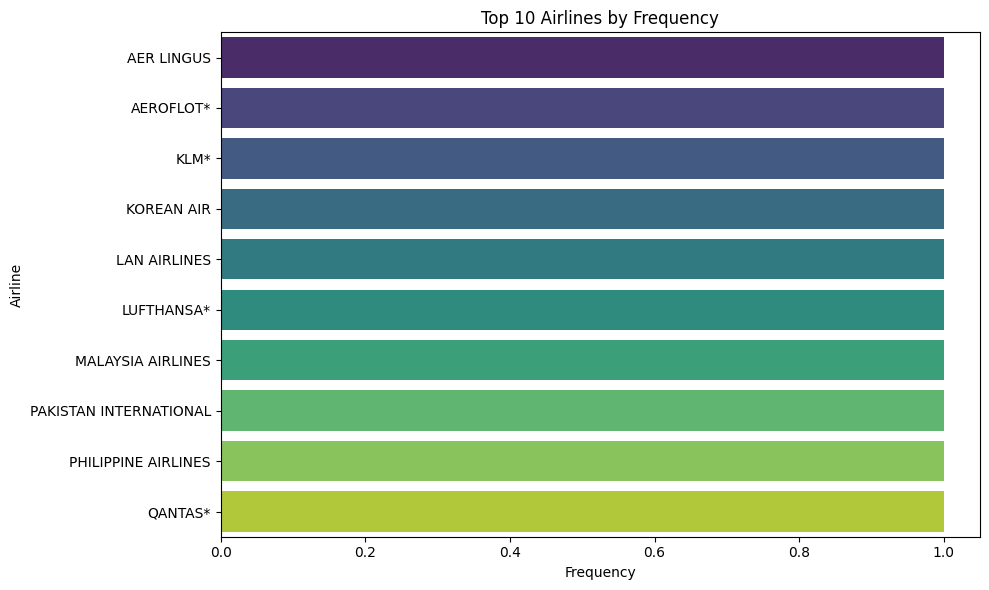

In [41]:
# Aggregate data: Show top 10 airlines by frequency
top_airlines = df['airline'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="viridis")
plt.title('Top 10 Airlines by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()


In [42]:
# Clean airline names
df['airline'] = df['airline'].str.strip().str.upper()

# Verify cleaned names
print(df['airline'].unique())


['AER LINGUS' 'AEROFLOT*' 'AEROLINEAS ARGENTINAS' 'AEROMEXICO*'
 'AIR CANADA' 'AIR FRANCE' 'AIR INDIA*' 'AIR NEW ZEALAND*'
 'ALASKA AIRLINES*' 'ALITALIA' 'ALL NIPPON AIRWAYS' 'AMERICAN*'
 'AUSTRIAN AIRLINES' 'AVIANCA' 'BRITISH AIRWAYS*' 'CATHAY PACIFIC*'
 'CHINA AIRLINES' 'CONDOR' 'COPA' 'DELTA / NORTHWEST*' 'EGYPTAIR' 'EL AL'
 'ETHIOPIAN AIRLINES' 'FINNAIR' 'GARUDA INDONESIA' 'GULF AIR'
 'HAWAIIAN AIRLINES' 'IBERIA' 'JAPAN AIRLINES' 'KENYA AIRWAYS' 'KLM*'
 'KOREAN AIR' 'LAN AIRLINES' 'LUFTHANSA*' 'MALAYSIA AIRLINES'
 'PAKISTAN INTERNATIONAL' 'PHILIPPINE AIRLINES' 'QANTAS*'
 'ROYAL AIR MAROC' 'SAS*' 'SAUDI ARABIAN' 'SINGAPORE AIRLINES'
 'SOUTH AFRICAN' 'SOUTHWEST AIRLINES' 'SRI LANKAN / AIRLANKA' 'SWISS*'
 'TACA' 'TAM' 'TAP - AIR PORTUGAL' 'THAI AIRWAYS' 'TURKISH AIRLINES'
 'UNITED / CONTINENTAL*' 'US AIRWAYS / AMERICA WEST*' 'VIETNAM AIRLINES'
 'VIRGIN ATLANTIC' 'XIAMEN AIRLINES']


<ipython-input-43-9bc6df343226>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_airlines.values[:10], y=sorted_airlines.index[:10], palette="coolwarm")


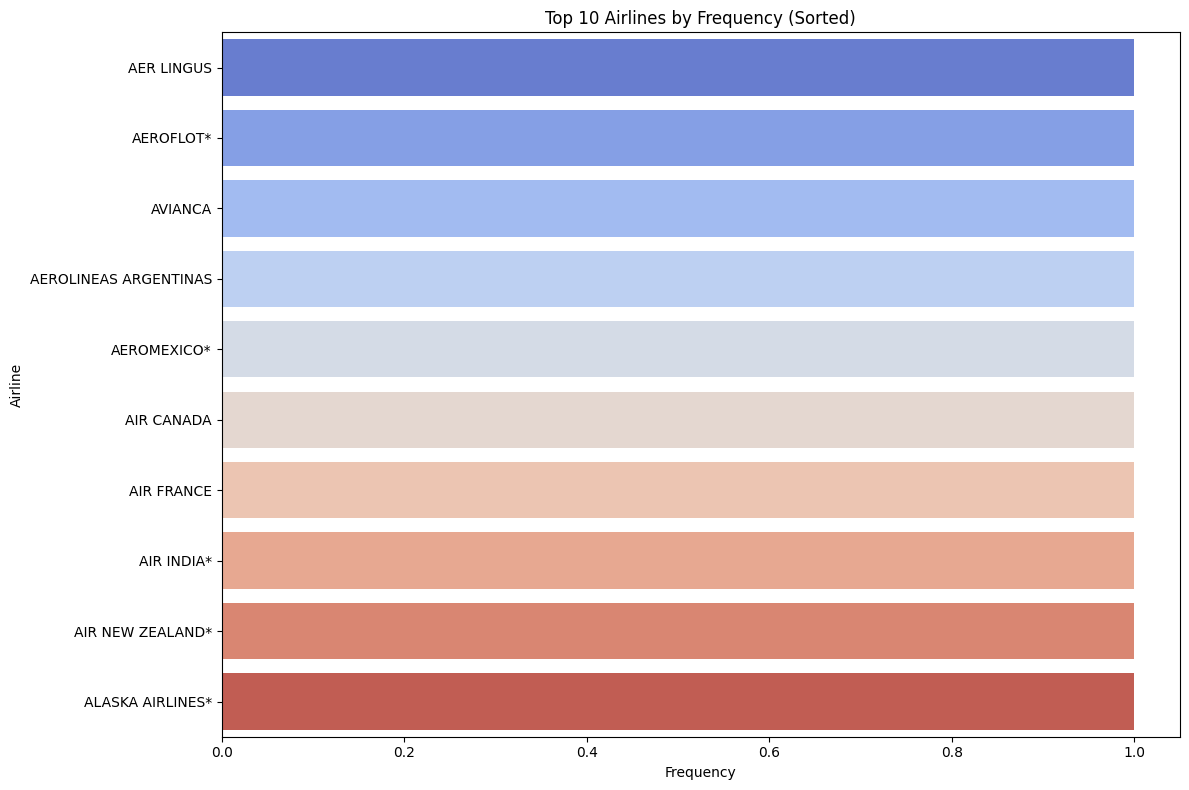

In [43]:
# Sort airlines by frequency
sorted_airlines = df['airline'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_airlines.values[:10], y=sorted_airlines.index[:10], palette="coolwarm")
plt.title('Top 10 Airlines by Frequency (Sorted)')
plt.xlabel('Frequency')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()


<ipython-input-44-1db402117f26>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.values, y=grouped_data.index, palette="Set2")


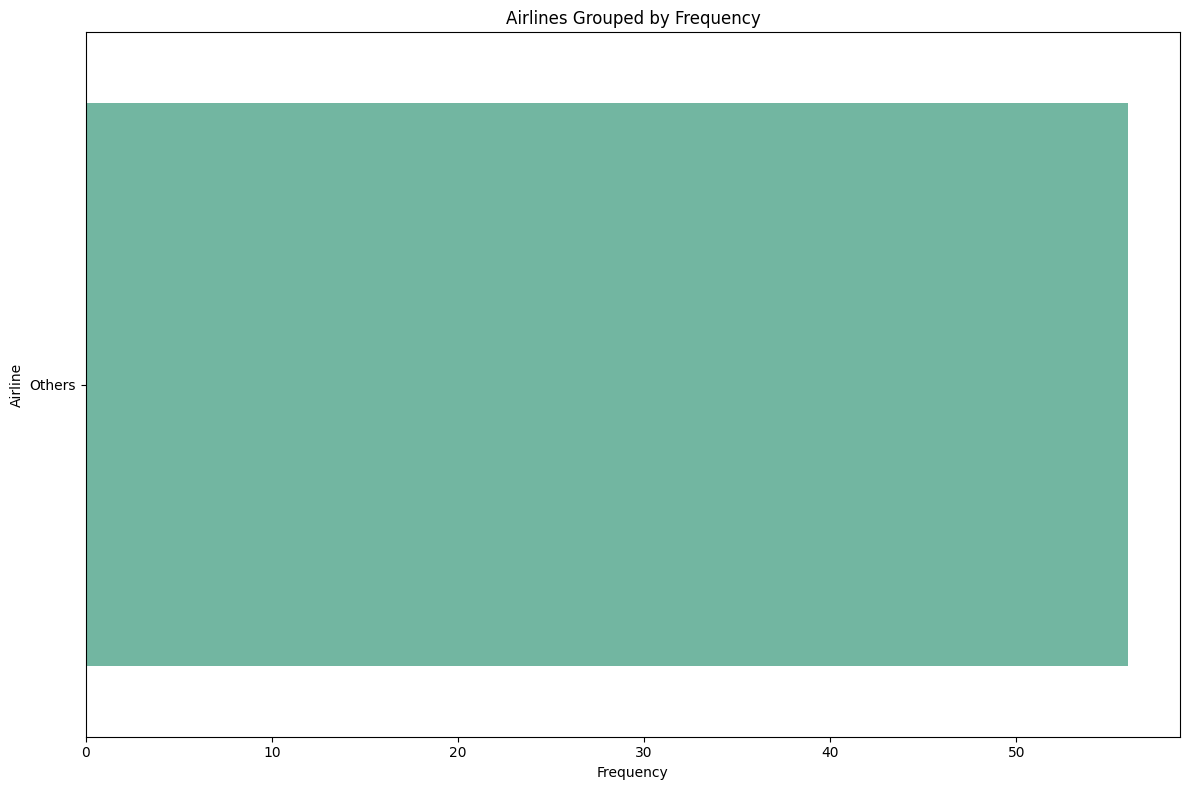

In [44]:
# Group airlines into "Others" category for less frequent ones
threshold = 5  # Minimum frequency to keep an airline as a separate category
df['airline_grouped'] = df['airline'].apply(lambda x: x if df['airline'].value_counts()[x] >= threshold else 'Others')

# Plot grouped data
grouped_data = df['airline_grouped'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=grouped_data.values, y=grouped_data.index, palette="Set2")
plt.title('Airlines Grouped by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()


<ipython-input-45-7bf25305d4ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="mako")


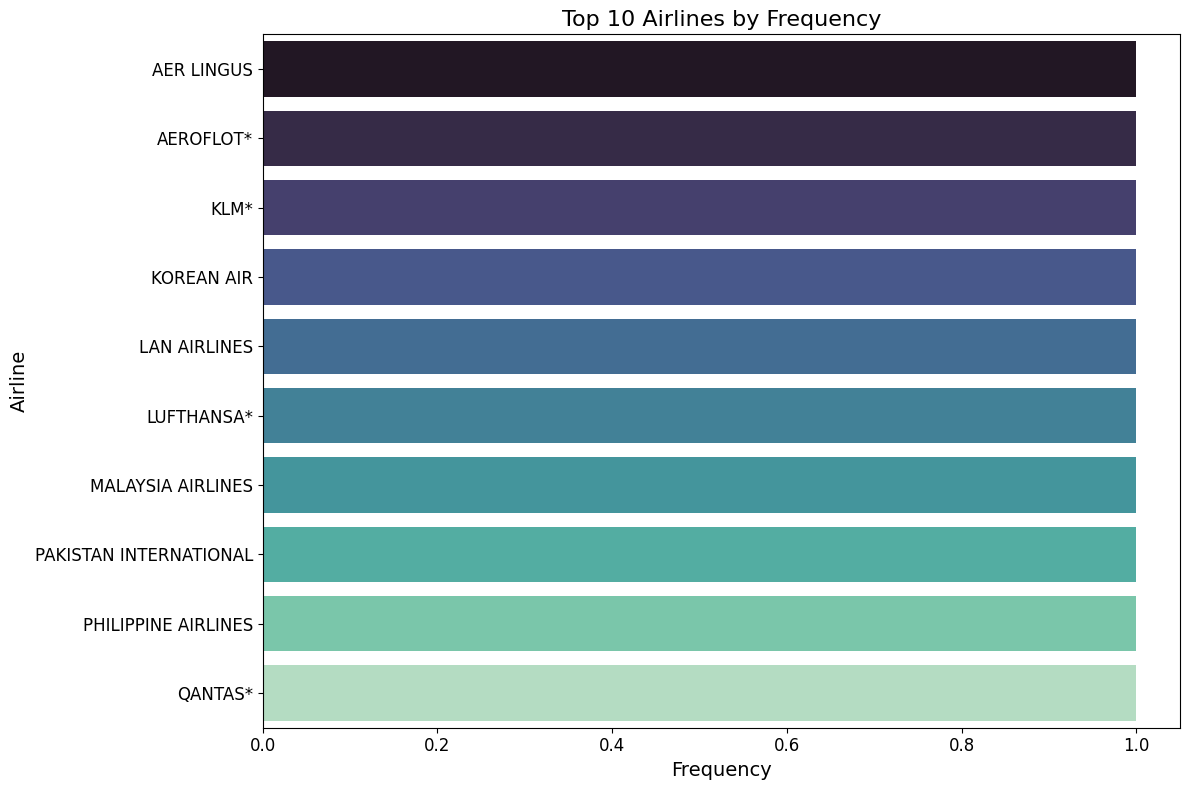

In [45]:
# Horizontal bar chart with rotated labels
top_airlines = df['airline'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="mako")
plt.title('Top 10 Airlines by Frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Airline', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


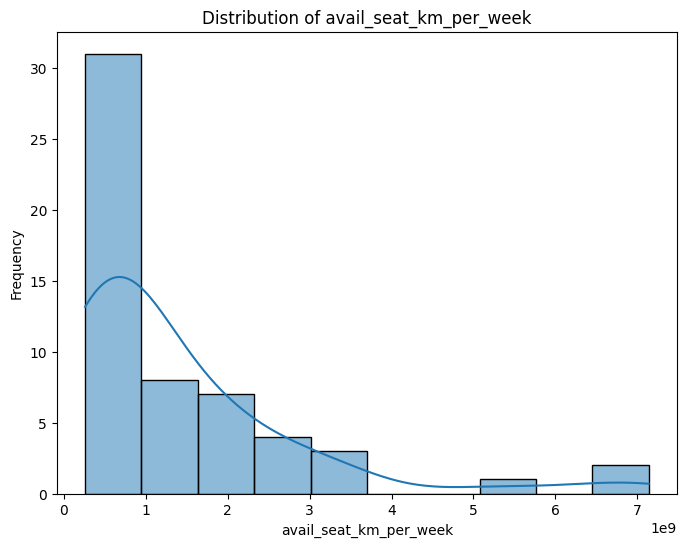

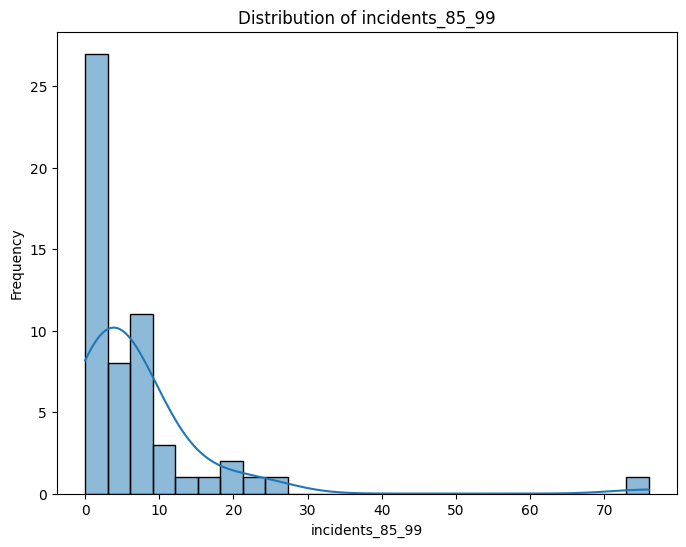

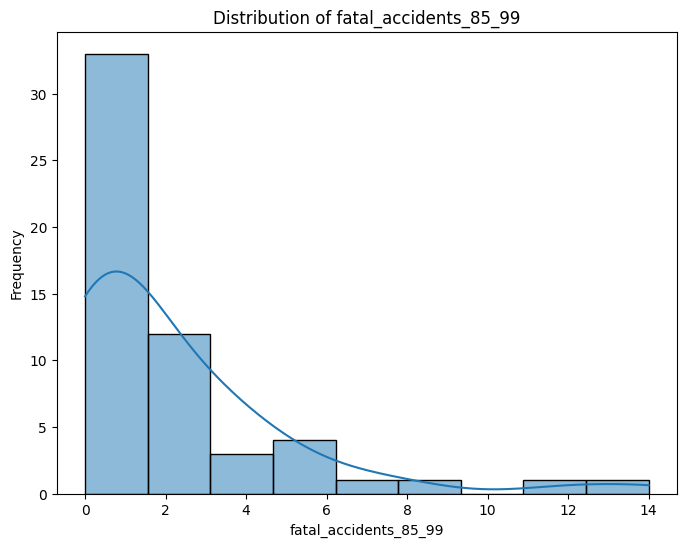

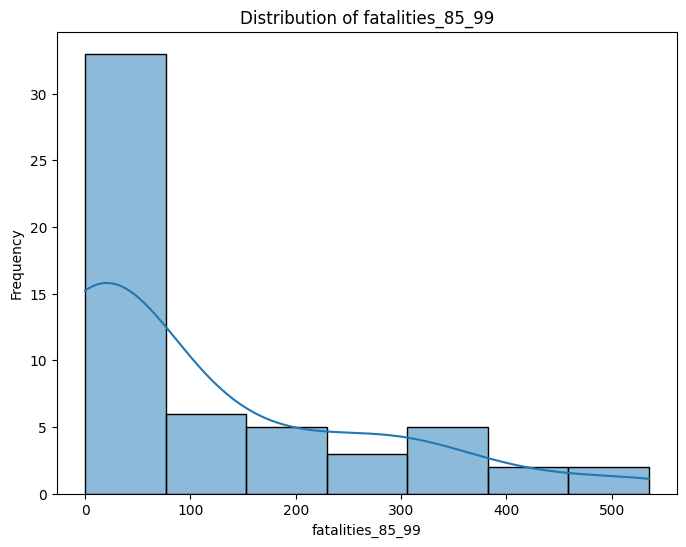

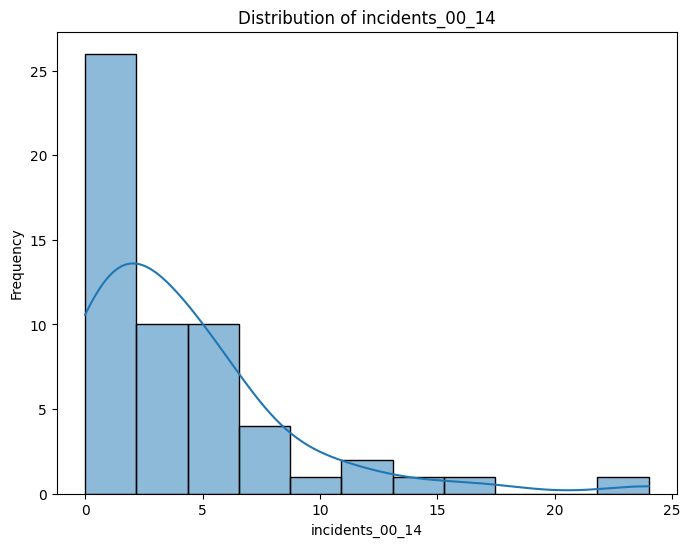

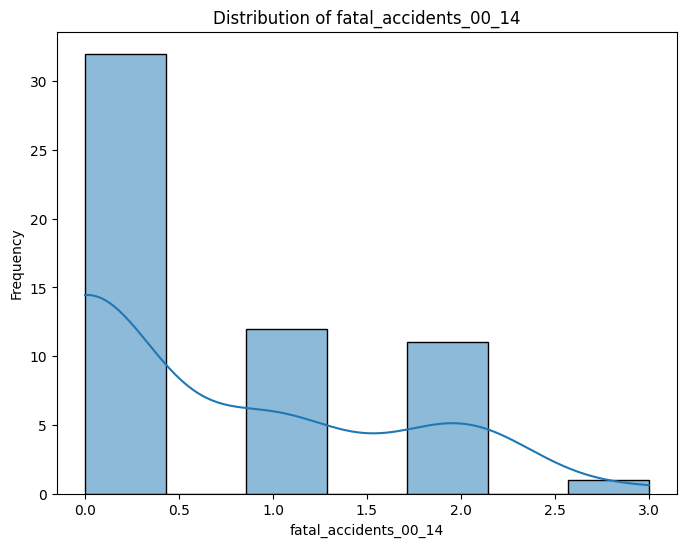

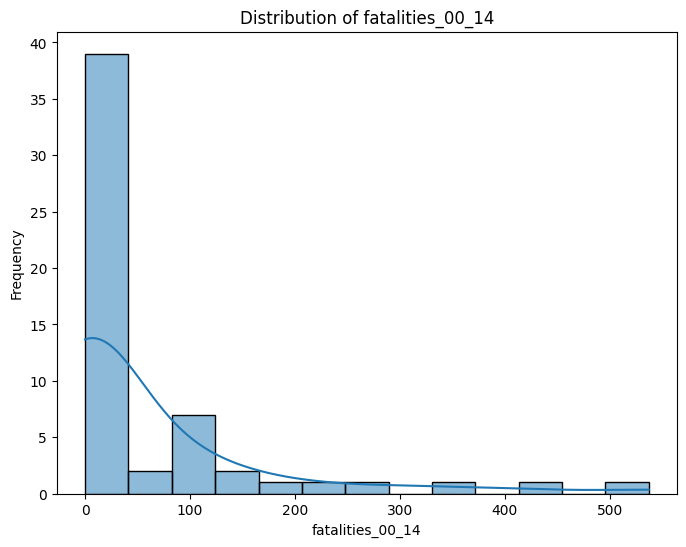

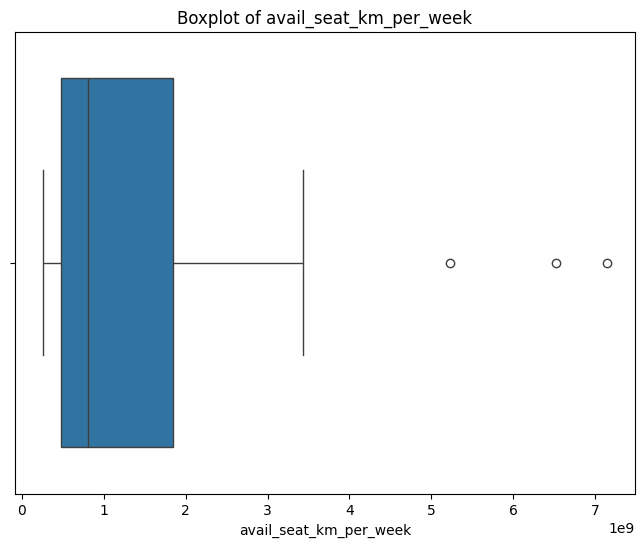

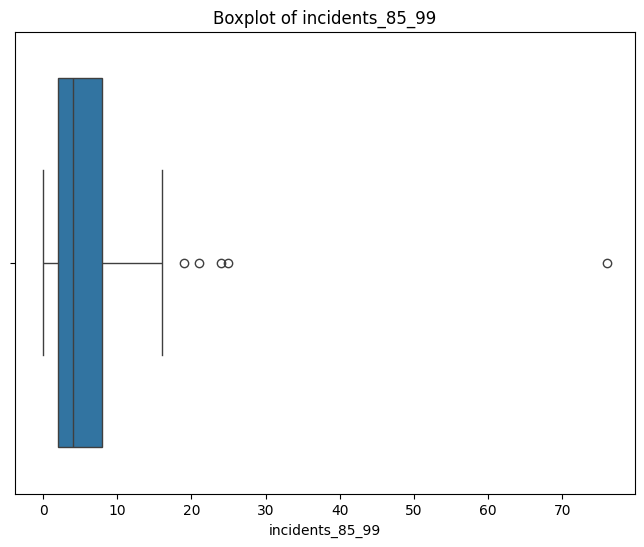

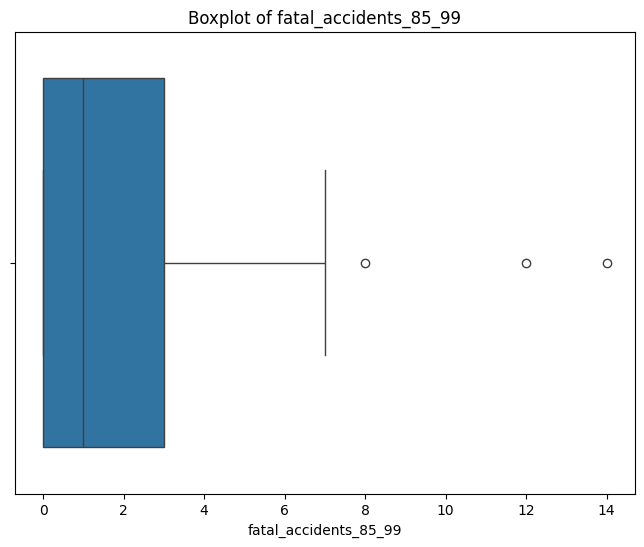

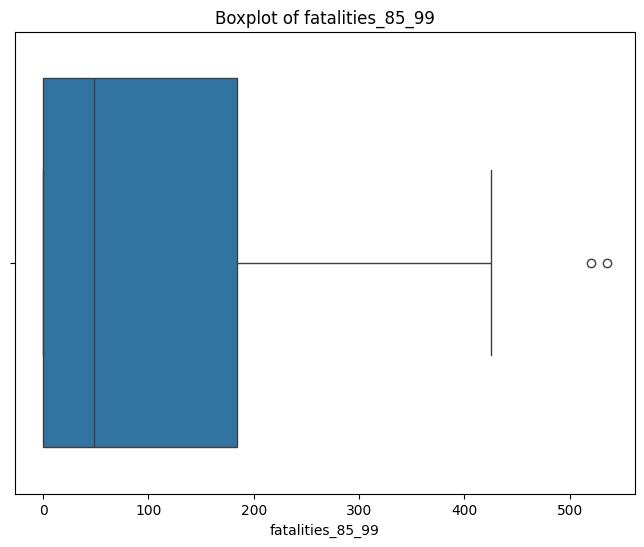

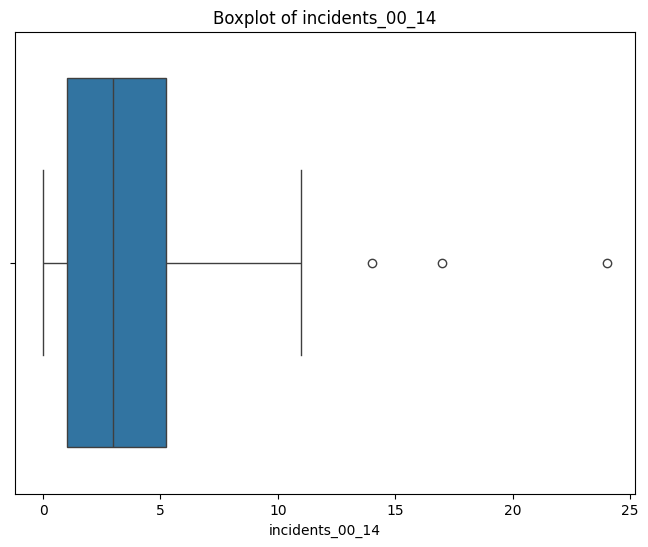

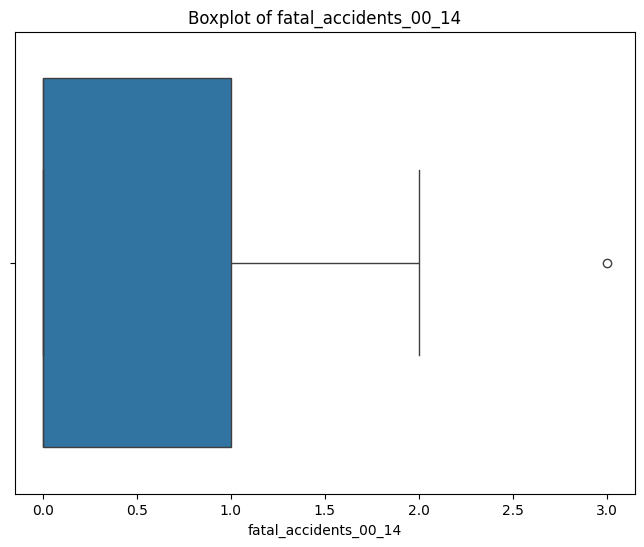

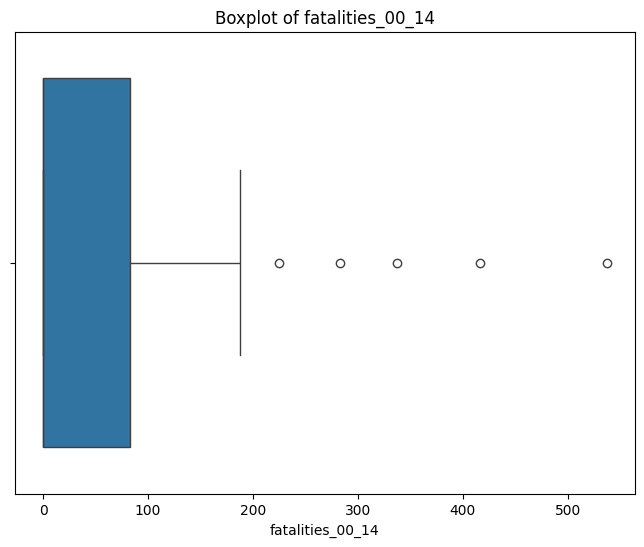

In [46]:
# Histograms for numerical columns
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(numeric_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for numerical columns
for column in numeric_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numeric_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


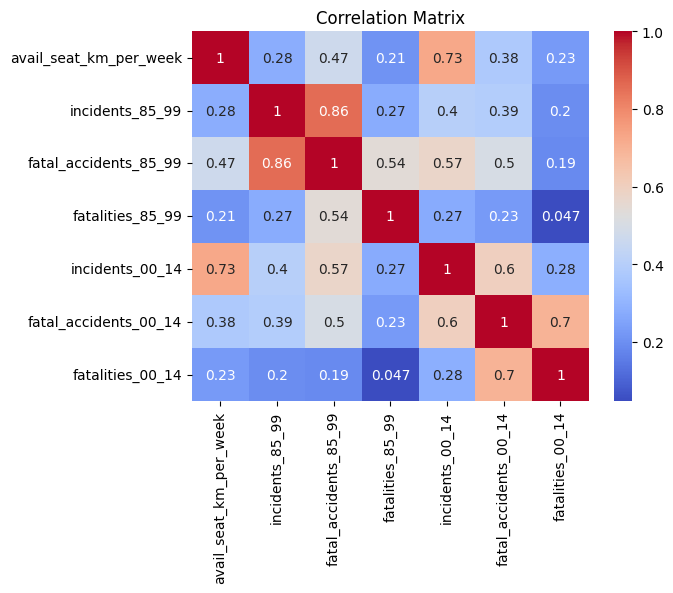

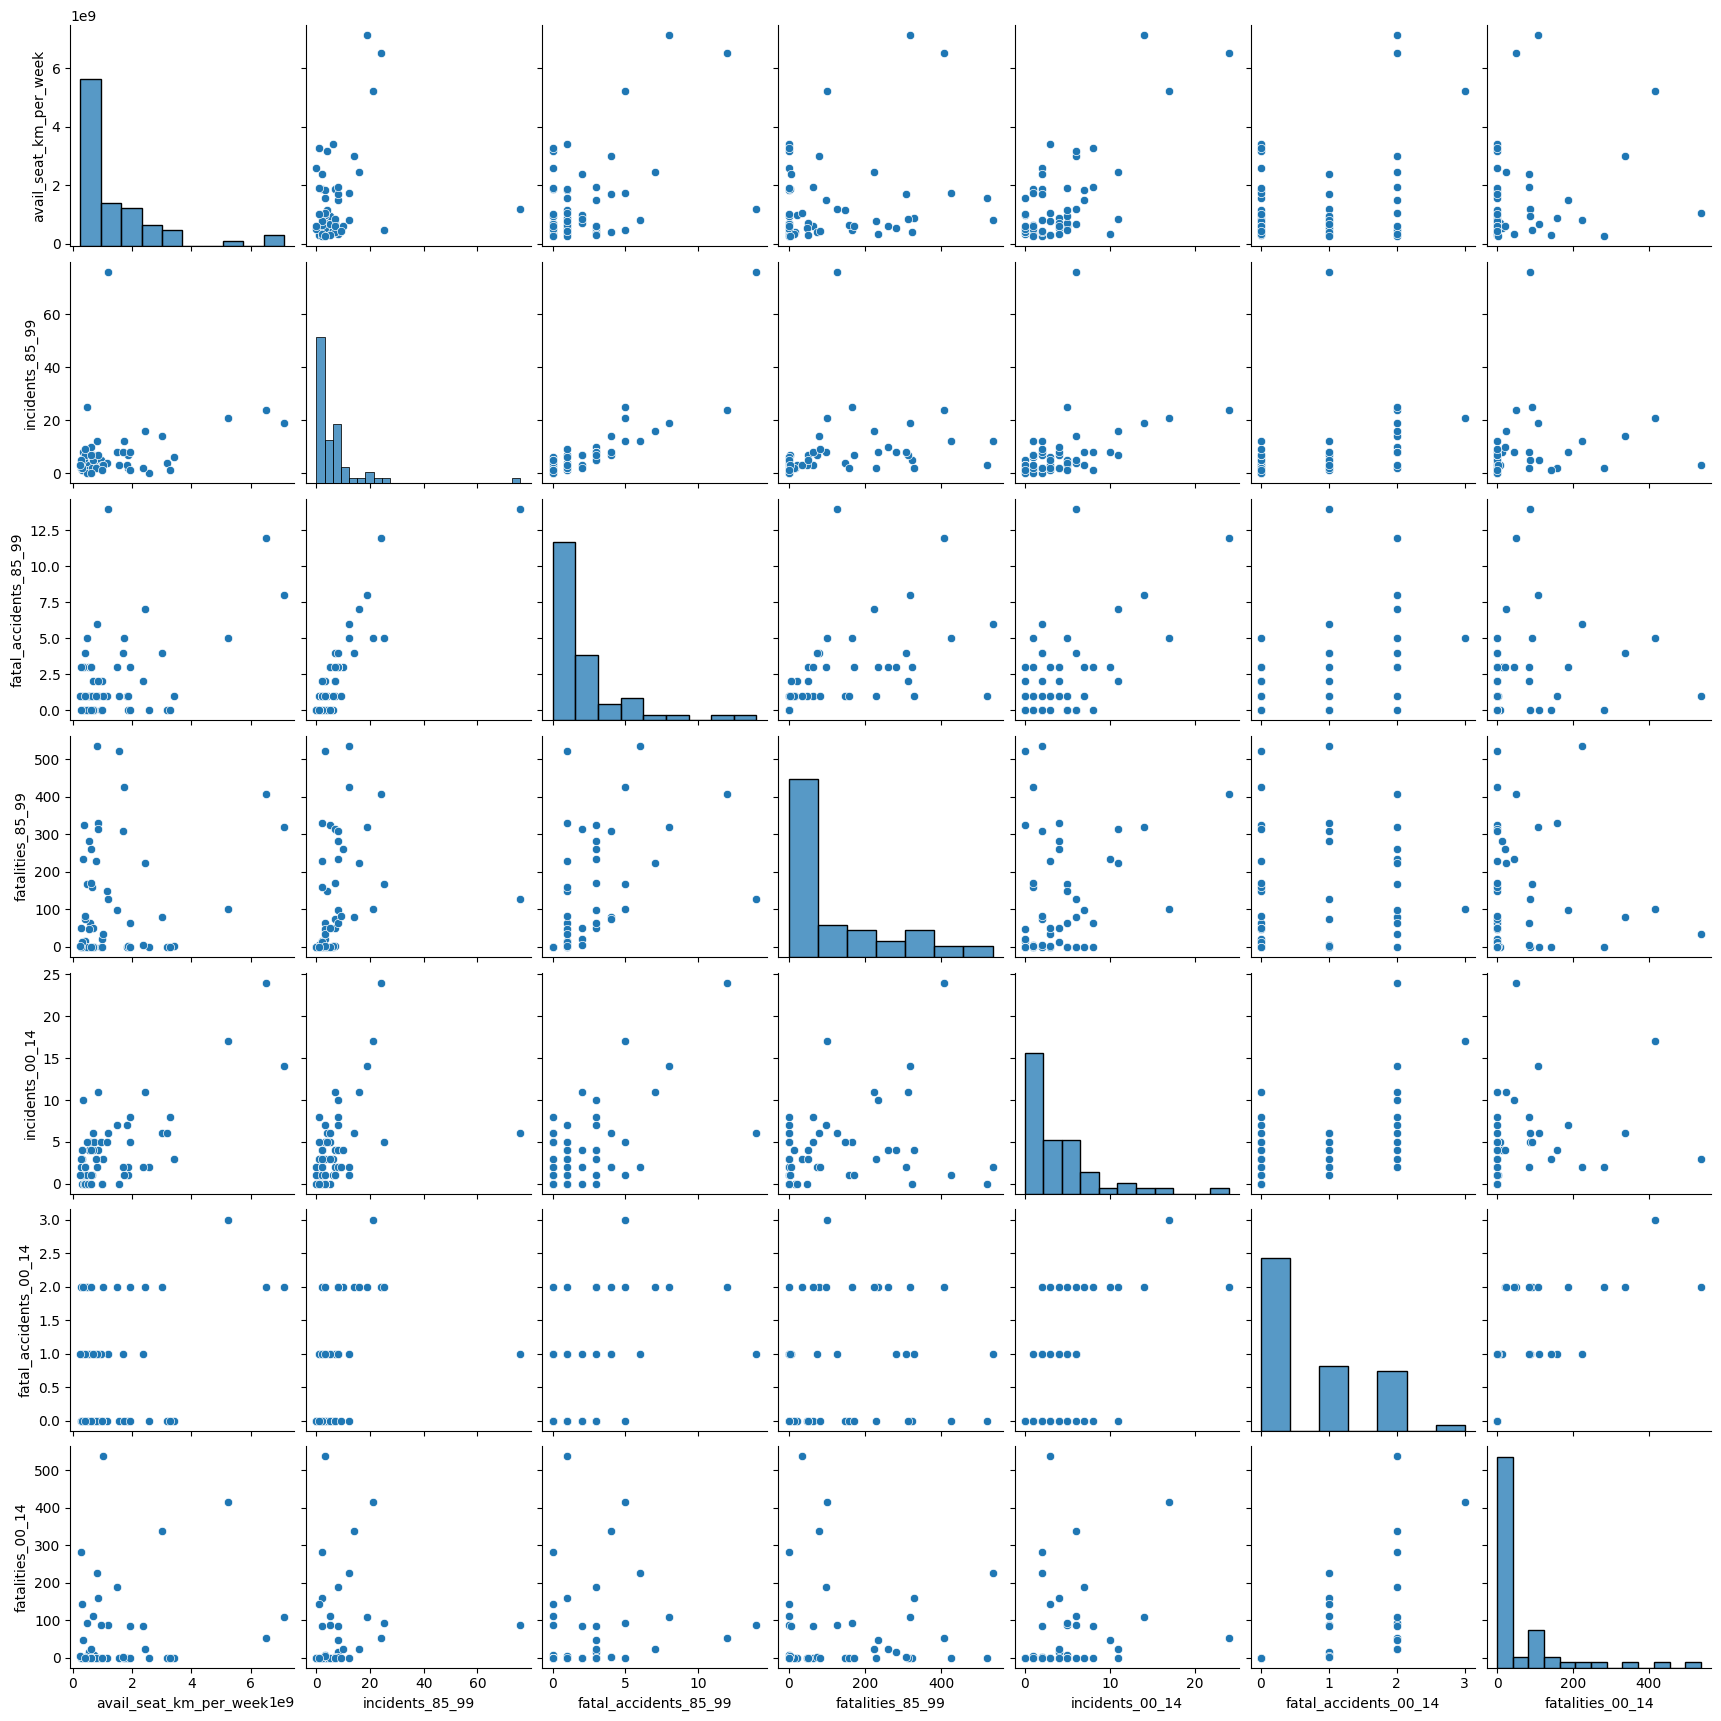

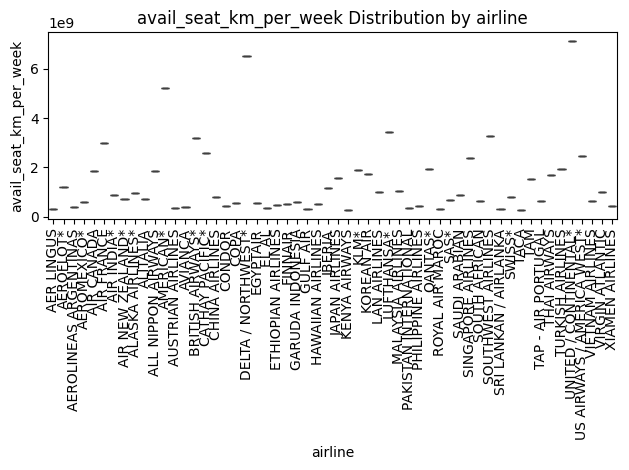

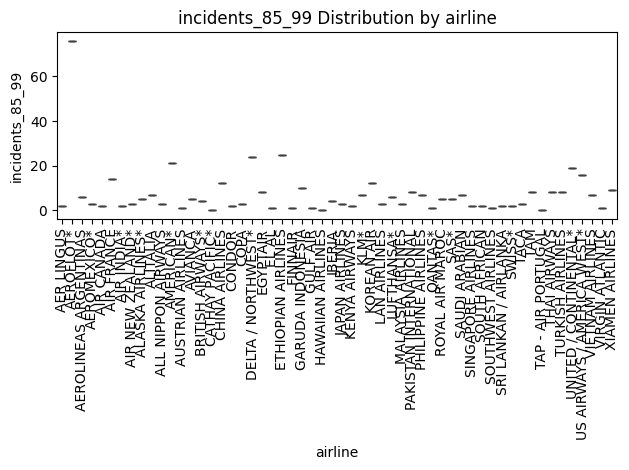

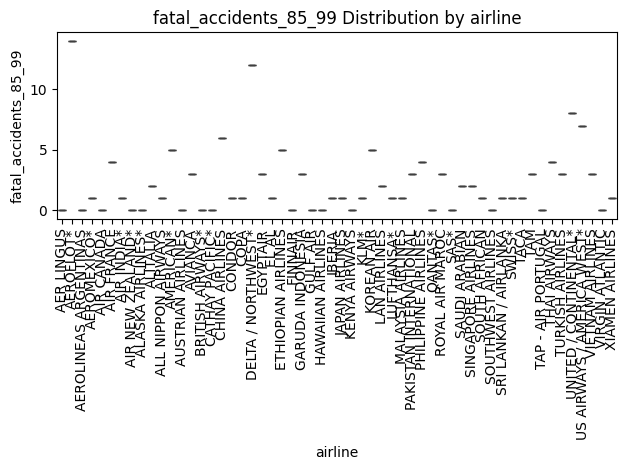

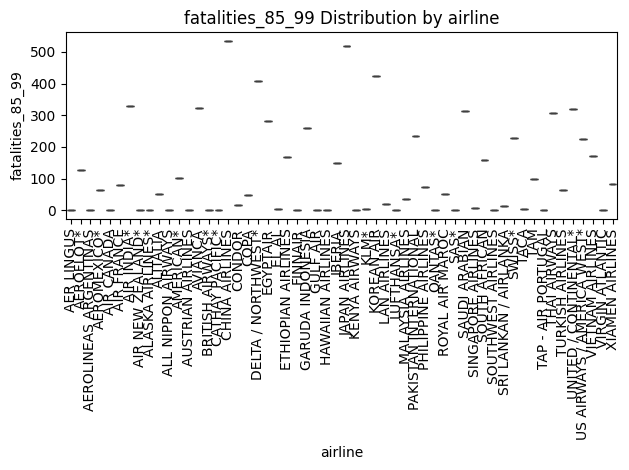

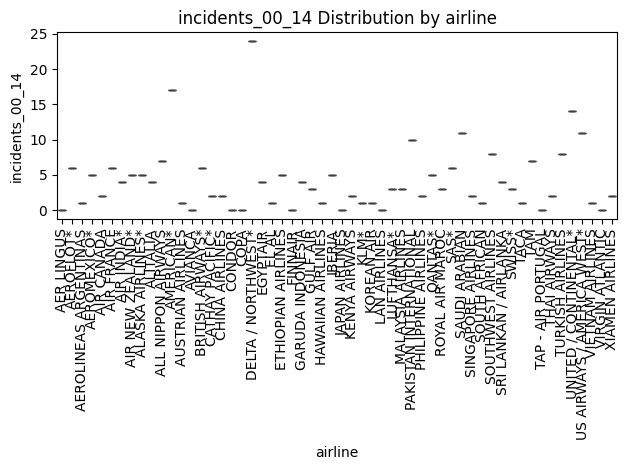

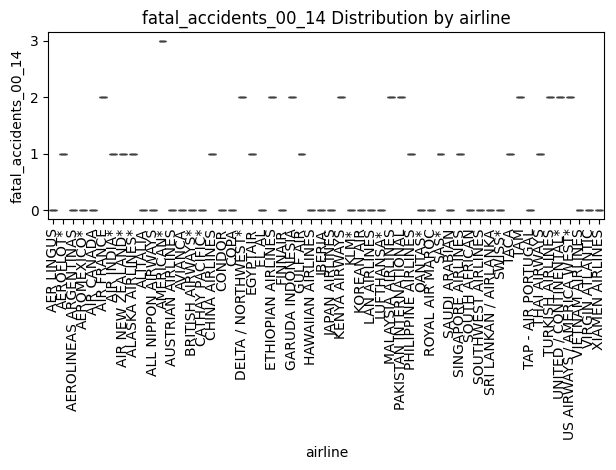

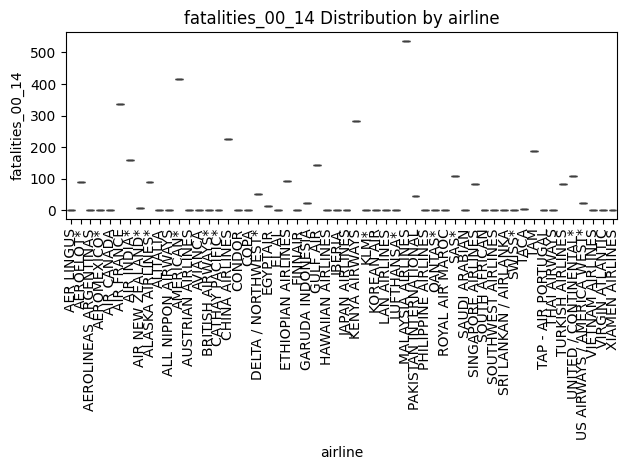

In [47]:
# Correlation matrix (numeric variables only)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatterplots for relationships between numerical variables
sns.pairplot(numeric_df)
plt.show()

# Boxplots comparing categorical vs numerical variables
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{num_col} Distribution by {cat_col}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


<ipython-input-48-bbcdb1cb30f0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="viridis")


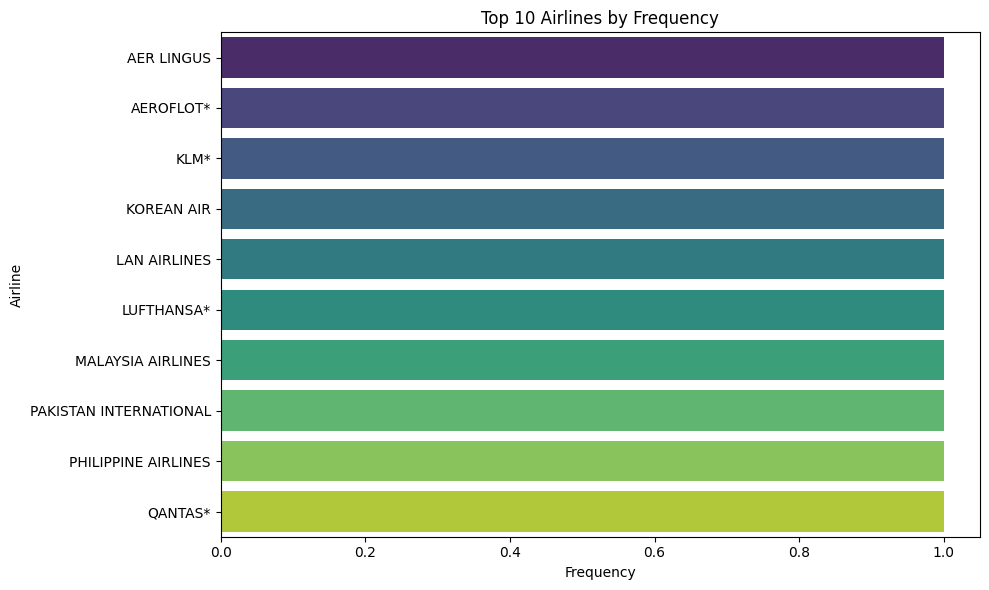

In [48]:
# Show top 10 airlines by frequency
top_airlines = df['airline'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="viridis")
plt.title('Top 10 Airlines by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()


<ipython-input-49-4a2f41799f20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="mako")


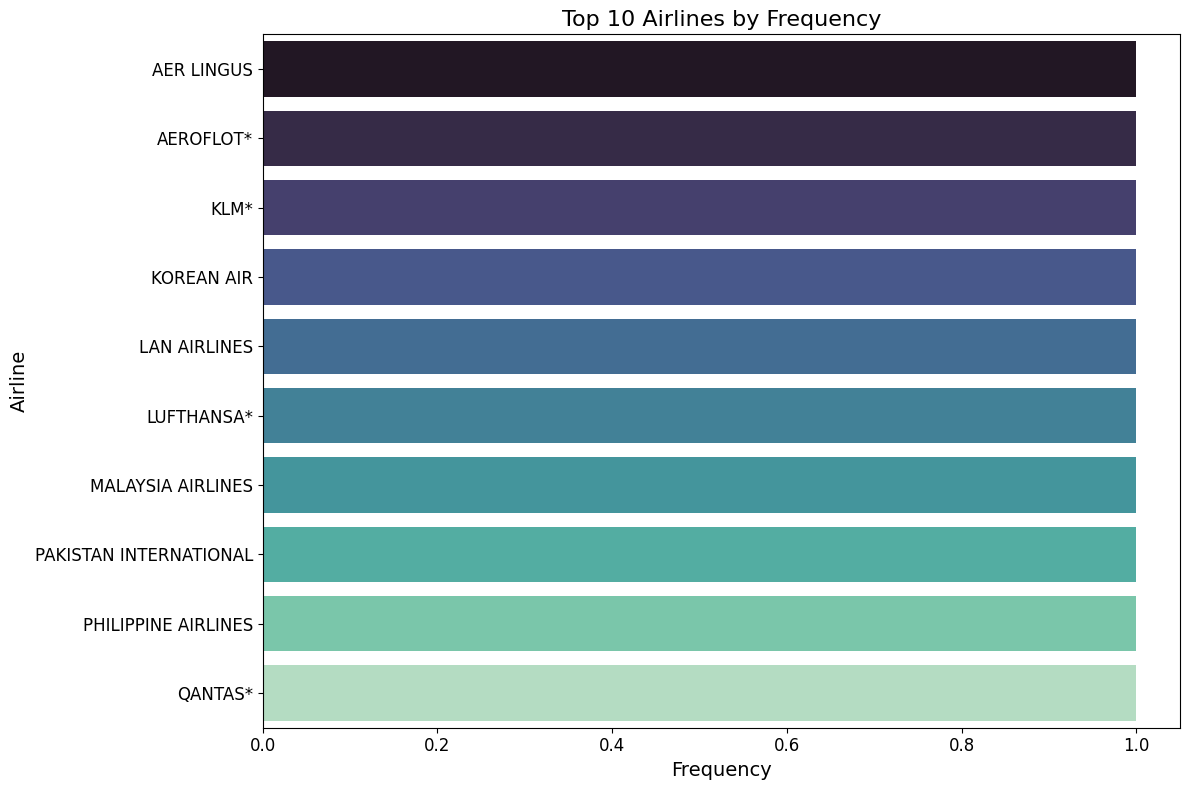

In [49]:
# Horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette="mako")
plt.title('Top 10 Airlines by Frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Airline', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


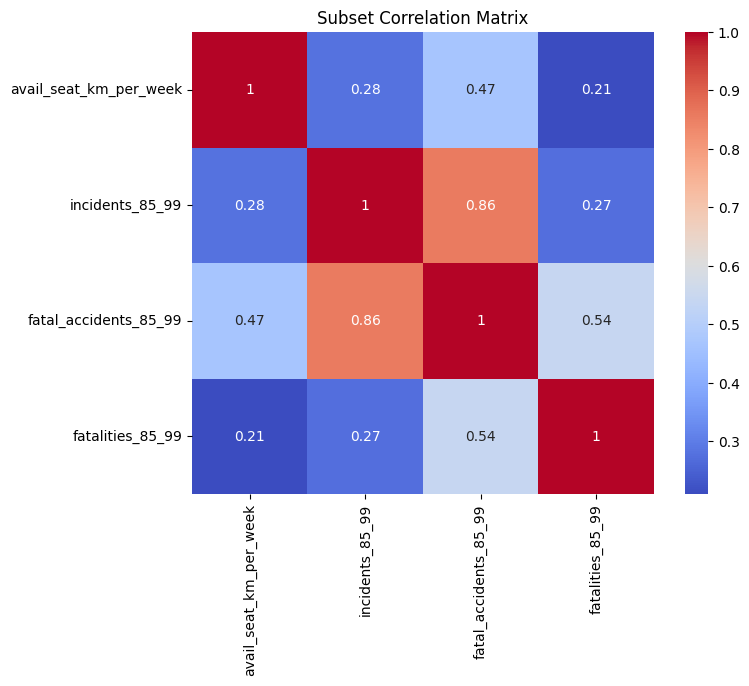

In [50]:
# Subset of variables for correlation analysis
key_columns = ['avail_seat_km_per_week', 'incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99']
subset_corr_matrix = df[key_columns].corr()

# Visualize subset correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Subset Correlation Matrix')
plt.show()


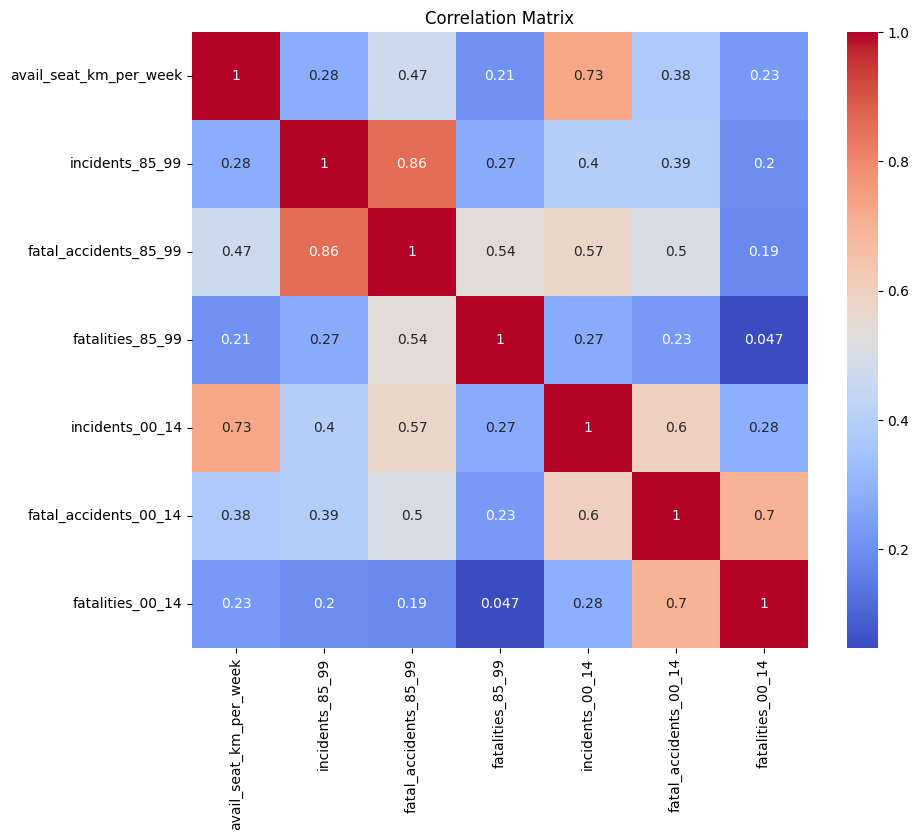

In [51]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


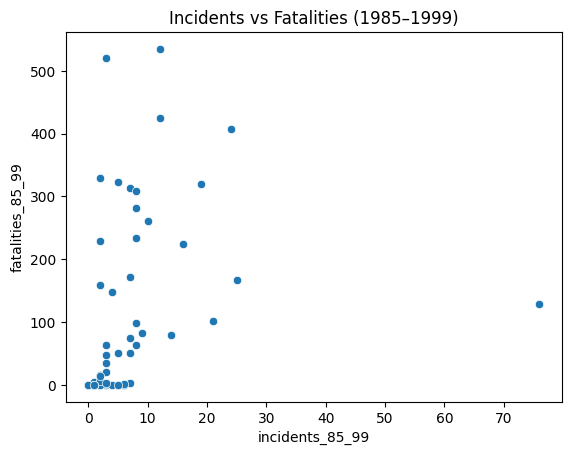

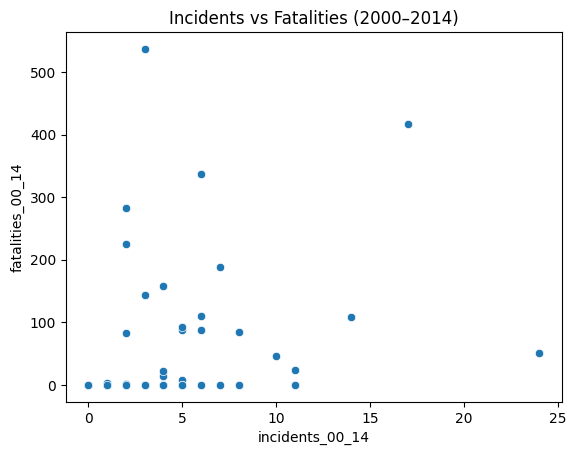

In [52]:
sns.scatterplot(x='incidents_85_99', y='fatalities_85_99', data=numeric_df)
plt.title('Incidents vs Fatalities (1985–1999)')
plt.show()

sns.scatterplot(x='incidents_00_14', y='fatalities_00_14', data=numeric_df)
plt.title('Incidents vs Fatalities (2000–2014)')
plt.show()


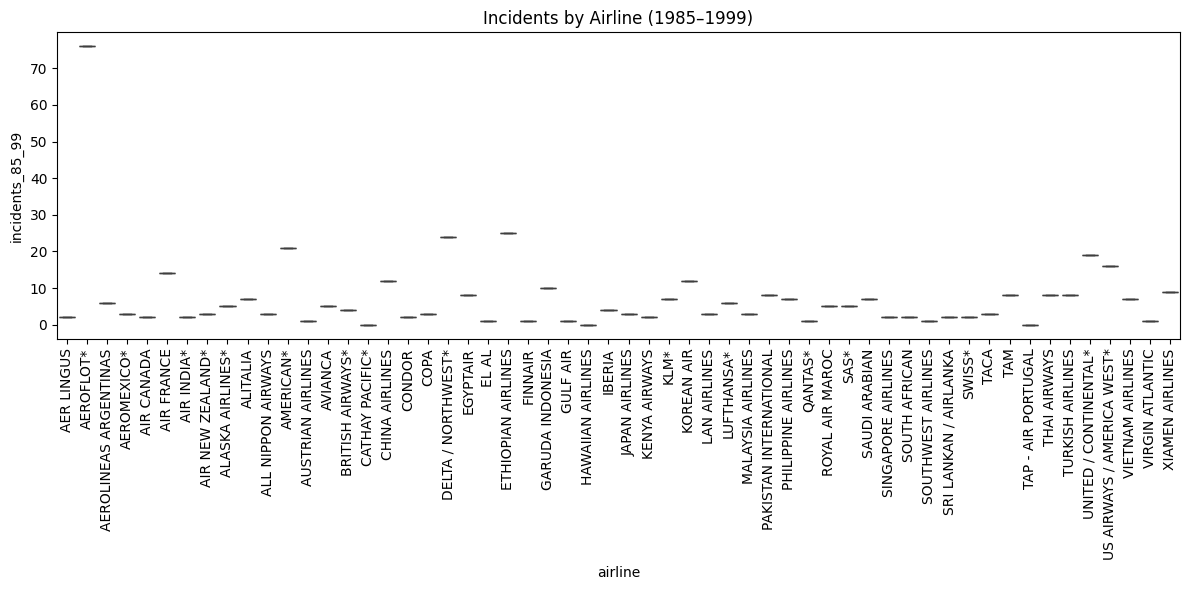

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='incidents_85_99', data=df)
plt.xticks(rotation=90)
plt.title('Incidents by Airline (1985–1999)')
plt.tight_layout()
plt.show()


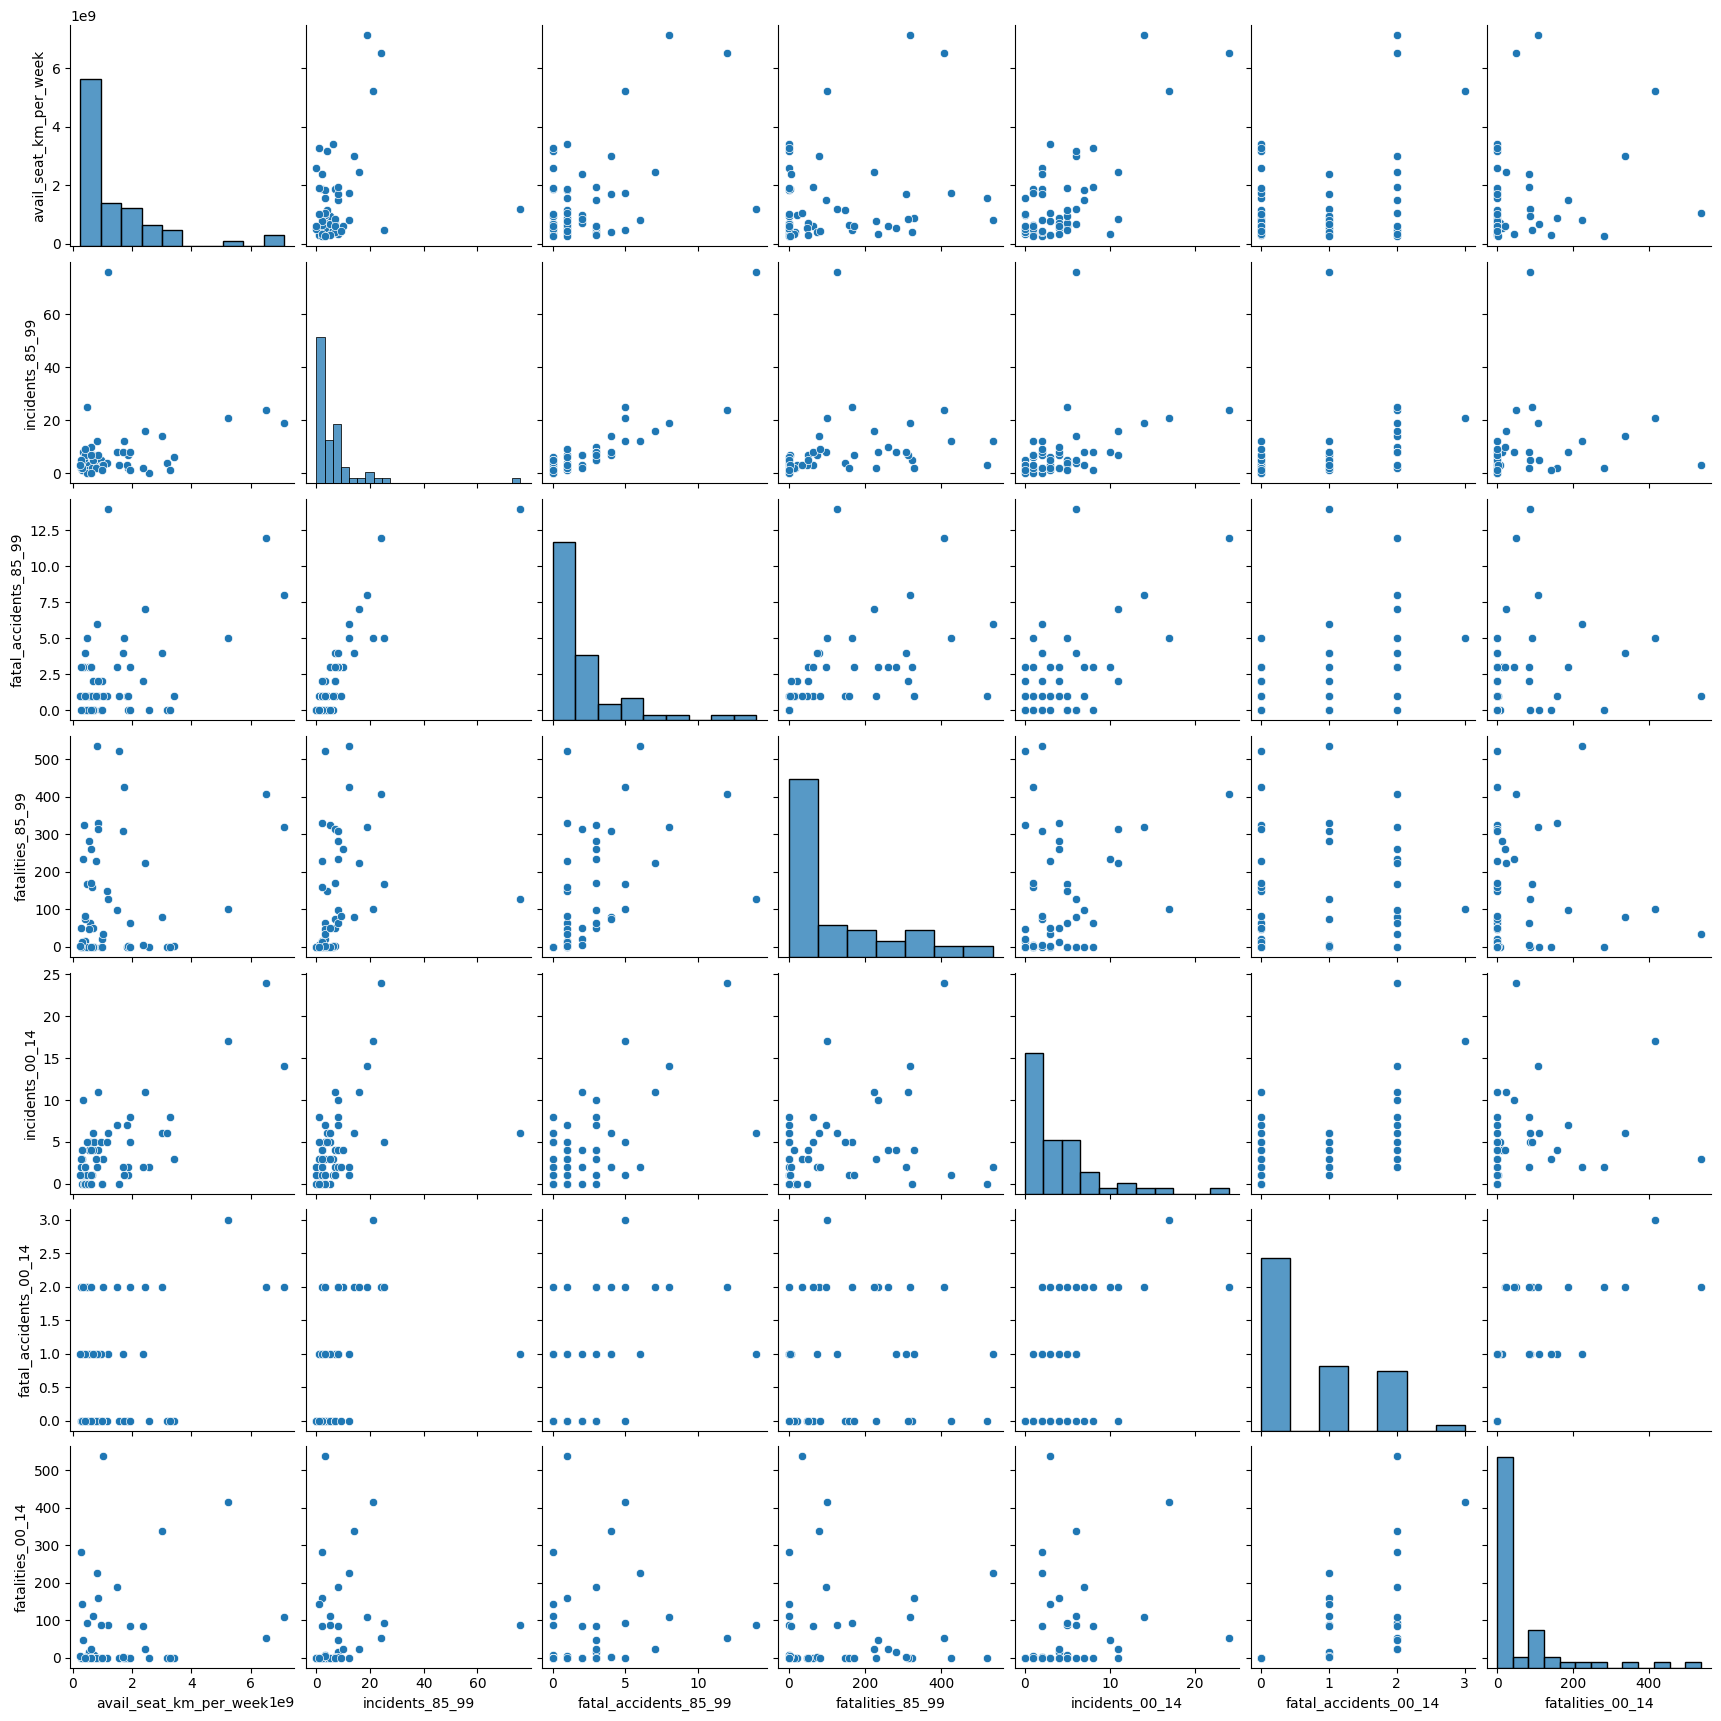

In [54]:
sns.pairplot(numeric_df)
plt.show()


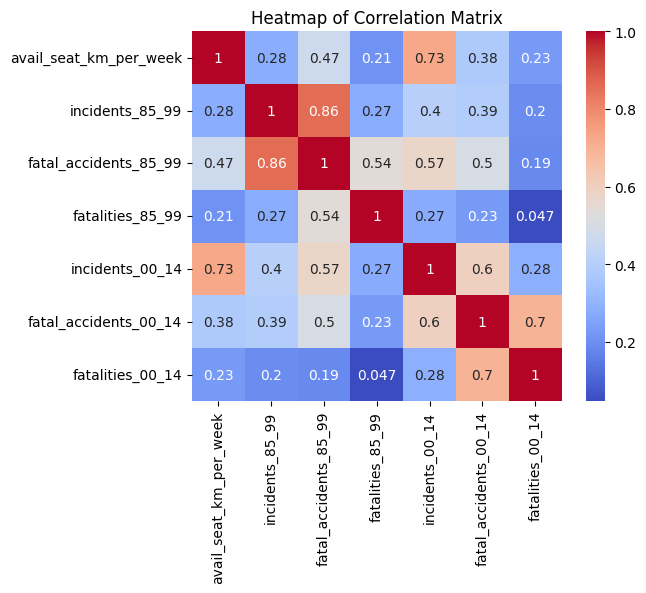

In [55]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [57]:
airline_summary = df.groupby('airline').mean()

airline_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Grouped Comparison by Airline')
plt.ylabel('Mean Values')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

airline                   object
avail_seat_km_per_week     int64
incidents_85_99            int64
fatal_accidents_85_99      int64
fatalities_85_99           int64
incidents_00_14            int64
fatal_accidents_00_14      int64
fatalities_00_14           int64
airline_grouped           object
dtype: object


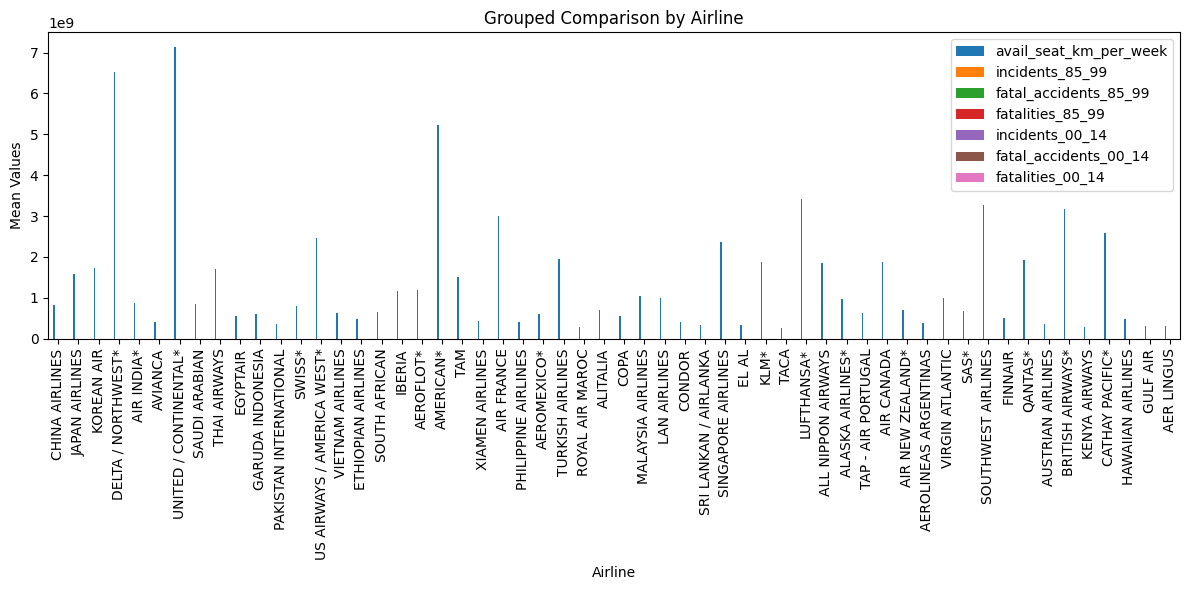

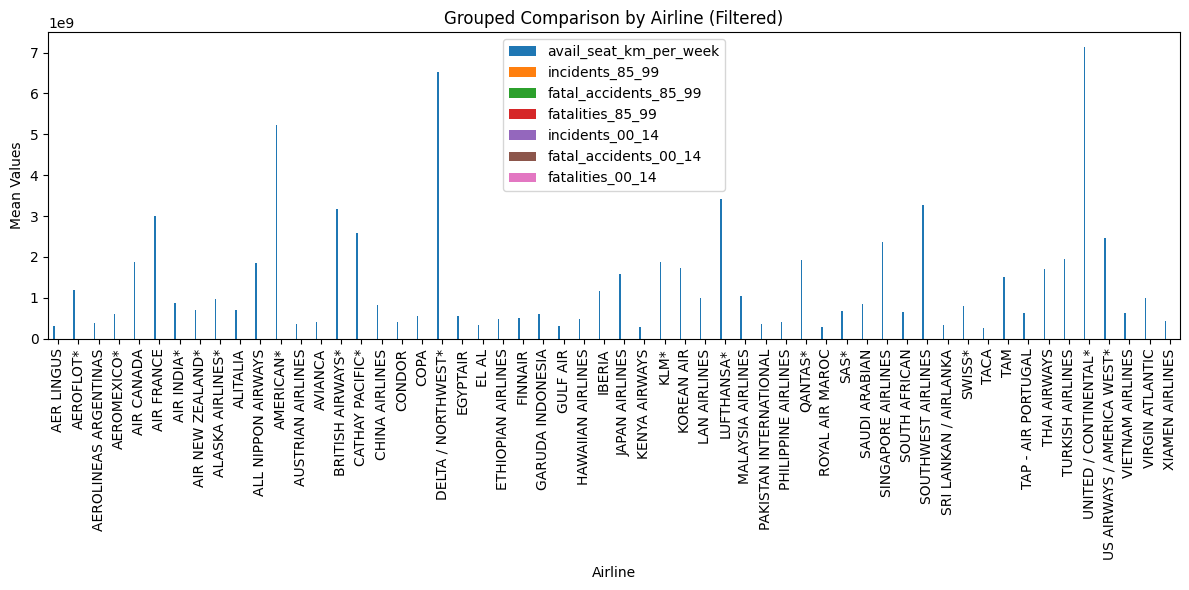

In [58]:
print(df.dtypes)
# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Group by 'airline' and calculate the mean for numeric columns
airline_summary = df.groupby('airline')[numeric_cols].mean()

# Sort by a specific column (e.g., 'fatalities_85_99') if needed
sorted_airlines = airline_summary.sort_values(by='fatalities_85_99', ascending=False)

# Plot grouped comparison
sorted_airlines.plot(kind='bar', figsize=(12, 6))
plt.title('Grouped Comparison by Airline')
plt.ylabel('Mean Values')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Filter out non-numeric rows if needed (e.g., 'Others')
df_filtered = df[df['airline'] != 'Others']

# Repeat grouping with filtered data
airline_summary = df_filtered.groupby('airline')[numeric_cols].mean()

# Plot grouped comparison
airline_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Grouped Comparison by Airline (Filtered)')
plt.ylabel('Mean Values')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [59]:
airline_summary = df.groupby('airline').mean()

airline_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Grouped Comparison by Airline')
plt.ylabel('Mean Values')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

In [60]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df['fatalities_85_99'], df['fatalities_00_14'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference between fatalities in the two time periods.")
else:
    print("No significant difference between fatalities.")


T-statistic: 2.3118889051506555, P-value: 0.022645920541900316
Significant difference between fatalities in the two time periods.


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = numeric_df[['avail_seat_km_per_week', 'incidents_85_99']]
y = numeric_df['fatal_accidents_85_99']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("R-squared Score:", model.score(X_test, y_test))


Model Coefficients: [3.28671180e-10 1.95895221e-01]
R-squared Score: 0.7112973076222646
